<a href="https://colab.research.google.com/github/khanfs/ComputationalBiology-xGenomics/blob/main/PDB_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Protein Data Bank APIs**
PyPDB and Biotite packages provide Protein Data Bank (PDB) APIs. Outlined is code to install them and examples of querying the PDB - using Biotite to filter structures by given criteria and PyPDB to download metadata and structural files. 
### **Research Collaboratory for Structural Bioinformatics PDB**
The [RCSB Protein Data Bank](https://www.rcsb.org/) is a structural biology database consisting of 3D structures of proteins, nucleic acids and [complex assemblies](https://www.ebi.ac.uk/QuickGO/term/GO:0034622). Experiments comprising *X-ray crystallography*, the de facto method for decades, *nuclear magnetic resonance (NMR)*, and *cryo-electron microscopy (cryo-EM)* generate structural data. cryo-EM is rapidly replacing X-ray crystallography, which is over a century old. PDB contains over **160,000 protein structures**. Each entry contains:

1. 3D coordinates of the atoms and the bonds connecting these atoms for proteins, ligand, cofactors, water molecules, and ions
2. 3D visualisations of the protein structures, with ligand interactions if available
3. meta-information on the structural data, e.g.'s, the PDB ID, the authors, the deposition date, the structural determination method used
4. structural quality metrics - structural resolution - it measures the collected data quality, which has the unit Å (Angstrom); the lower the value, the higher the quality of the structure.

**Resources:**
* [PDB Meta-information list of fields for chemicals](https://search.rcsb.org/chemical-search-attributes.html)
* [PDB Meta-information list of fields for structures](https://search.rcsb.org/structure-search-attributes.html) 

**References:**
* Rose, P. W., Prlić, A., Altunkaya, A., Bi, C., Bradley, A. R., Christie, C. H., Costanzo, L. D., Duarte, J. M., Dutta, S., Feng, Z., Green, R. K., Goodsell, D. S., Hudson, B., Kalro, T., Lowe, R., Peisach, E., Randle, C., Rose, A. S., Shao, C., Tao, Y. P., … Burley, S. K. (2017). The RCSB protein data bank: integrative view of protein, gene and 3D structural information. Nucleic acids research, 45(D1), D271–D281. [https://doi.org/10.1093/nar/gkw1000](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5210513/)
* Berman, H. M., Westbrook, J., Feng, Z., Gilliland, G., Bhat, T. N., Weissig, H., Shindyalov, I. N., & Bourne, P. E. (2000). The Protein Data Bank. Nucleic acids research, 28(1), 235–242. [https://doi.org/10.1093/nar/28.1.235](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC102472/)

In [1]:
# Install Conda environment
! pip install -q condacolab

In [1]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# **1. PyPDB**
PyPDB can search the PDB by keyword, author, publication date and experimental method, as well as by specific sequence motifs. For individual PDB IDs, retrievable information ranges from metadata (date of posting, authors, etc.) to the full. pdb data file stored with an entry. Standard information such as gene ontology, ligand information and protein family information can be accessed. PyPDB can also perform BLAST searches (Gilpin, 2016). The Python package pypdb offers an interface for the PDB to not only query for PDB IDs but also to download associated metadata and structural files. 

**Resources:**

* [Primary PyPDB functions](https://academic.oup.com/view-large/35641249)
* [Functions for searching the RCSB PDB for lists of PDB IDs](https://github.com/williamgilpin/pypdb/blob/master/pypdb/pypdb.py)

**References:**

*  William Gilpin, PyPDB: a Python API for the Protein Data Bank, Bioinformatics, Volume 32, Issue 1, 1 January 2016, Pages 159–160, [https://doi.org/10.1093/bioinformatics/btv543](https://academic.oup.com/bioinformatics/article/32/1/159/1743800) 

In [3]:
# Install PyPDB 
! pip install pypdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! pytest

============================= test session starts ==============================
platform linux -- Python 3.7.13, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 0 items                                                              

========================= no tests ran in 0.01 seconds =========================


## **PyPDB Functions**

There are generally 3 types of functions:

* Functions that perform searches and return lists of PDB IDs
* Functions that get information about specific PDB IDs
* Other general-purpose lookup functions

In [5]:
# (*) will import every function from the pydb package
from pypdb import *

### 1. Get a list of PDBs for a specific search term

In [12]:
found_pdbs = Query('ACE2').search()
print(found_pdbs)

['7U0N', '7JVO', '6M1D', '6M18', '1R4L', '1R42', '7RPV', '6M17', '6ACD', '6ACC', '7DK3', '7V61', '7KMB', '7DF4', '6VW1', '7DF3', '6ACK', '6ACJ', '6ACG', '7WRV', '7C8D', '7A93', '7KNI', '7KNH', '7KNE', '7KNB', '7KMZ', '7KMS', '3D0I', '3D0H', '3D0G', '2G75', '7XO5', '7WPC', '7WPB', '7WPA', '7VX5', '7VX4', '7V8A', '7V89', '7V88', '7T9K', '7KJ4', '7KJ3', '7KJ2', '7DMU', '7A98', '7A97', '7A96', '7A95', '7A94', '7A92', '7A91', '6M0J', '6LZG', '7W9I', '7WP9', '7KJ5', '7JWY', '6XM5', '6XM4', '6XM3', '6XM0', '6XLU', '7WPF', '7WPE', '7WPD', '7XOC', '7XOB', '7XOA', '7XO9', '7XO8', '7XO7', '7XO6', '7XO4', '7VXM', '7VXK', '7VXF', '7VXD', '7VXA', '7VX9', '7MJN', '7MJM', '7EFR', '7EFP', '7WEV', '7VXI', '7VXE', '7VX1', '7F5R', '7W9C', '7W9B', '7W99', '7W98', '7E7E', '7XOD', '7T9J', '7E3J', '7W94', '7W92', '2DD8', '7VXC', '7VXB', '7V86', '7V85', '7V83', '7V82', '7V81', '7V7Z', '7TEZ', '7TEW', '7T9L', '7SY8', '7SY6', '7SY4', '7SY2', '7SY0', '7SXY', '7EDJ', '7DX8', '7DX6', '3SCL', '3SCK', '7DDP', '7DDO',

### 2. Search by PubMed ID Number


In [ ]:
found_pdbs = Query('27499440', 'PubmedIdQuery').search()
print(found_pdbs)

### 3. Search by source organism using NCBI TaxId
The [Taxonomy Database](https://www.ncbi.nlm.nih.gov/taxonomy) is a curated classification and nomenclature for all of the organisms in the public sequence databases. This currently represents about 10% of the described species of life on the planet. Taxonomy databased accessed through [taxonomy web browser](https://www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi). 

**References:**

* Schoch C. NCBI Taxonomy. 2011 Apr 7 [Updated 2020 Feb 11]. In: Taxonomy Help [Internet](https://www.ncbi.nlm.nih.gov/books/NBK53758/#_NBK53758_pubdet_). Bethesda (MD): National Center for Biotechnology Information (US); 2011-.
* Schoch CL, Ciufo S, Domrachev M, Hotton CL, Kannan S, Khovanskaya R, Leipe D, Mcveigh R, O'Neill K, Robbertse B, Sharma S, Soussov V, Sullivan JP, Sun L, Turner S, Karsch-Mizrachi I. NCBI Taxonomy: a comprehensive update on curation, resources and tools. Database (Oxford). 2020 Jan 1;2020:baaa062. [doi: 10.1093/database/baaa062](https://pubmed.ncbi.nlm.nih.gov/32761142/). PMID: 32761142; PMCID: PMC7408187. 



In [15]:
found_pdbs = Query('9606', 'TreeEntityQuery').search() #TaxID for homo sapiens
print(found_pdbs[:5])

['10GS', '11GS', '121P', '12CA', '12GS']


# **2. Biotite**
[Biotite](https://www.biotite-python.org/) is an open source comprehensive computational molecular biology framework for analysis of sequence and structure data, where most of the data can be handled internally, without the usage of additional software. **It handles the complete bioinformatics workflow**, from fetching, reading and writing relevant files to the efficient and intuitive analysis and manipulation of data (Kunzmann, P., Hamacher, K., 2018). Biotite provides read and write capabilities for the FASTA format, hence FASTA files can be used to load and save nucleotide and protein sequences. Biotite makes heavy use of NumPy and some code is written in [Cython](https://cython.org/), resulting in performance comparable to native C code.

**Resources:**

* [API Reference](https://www.biotite-python.org/apidoc/index.html)

**References:**

* Kunzmann, P., Hamacher, K. Biotite: a unifying open source computational biology framework in Python. BMC Bioinformatics 19, 346 (2018). [https://doi.org/10.1186/s12859-018-2367-z](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2367-z#citeas)

In [17]:
# Install Biotite
! pip install biotite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Biotite Functions**

**Biotite is divided into four subpackages**: sequence and structure provide tools for handling sequences or biomolecular structures, respectively. database is used for fetching files from biological databases and application offers interfaces for external software. 

1. **Sequence subpackage:** contains functionality for working with sequence information of any kind. The package contains by default sequence types for nucleotides and proteins.

2. **Structure subpackage:** enables handling of 3D structures of biomolecules. Simplified, a structure is represented by a list of atoms and their properties, based on ndarray objects. Optionally, this representation can be enriched with chemical bond information. Biotite supports different structure formats, including the ones provided by the RCSB and Gromacs trajectory formats. The subpackage offers a wide range of functions for atom filtering, coordinate transformations, angle and bond measurements, accessible surface area calculation, structure superimposition and more.

3. **Application subpackage:** provides interfaces for external software, in case Biotite’s integrated functionality is not sufficient for your tasks. These interfaces range from locally installed software (e.g. MSA software) to web services (e.g. BLAST). The speciality is that the interfaces are seamless: You do not have to write input files and read output files, you only have to input Python objects and you get Python objects. It is basically very similar to using normal Python functions.

4. **Database subpackage:** is all about searching and downloading data from biological databases, including the arguably most important ones: the RCSB PDB and the NCBI Entrez database.


In [18]:
# Import Biotite PDB API
import biotite.database.rcsb as rcsb

**Tempfile:** is a Python module used in a situation, where we need to read multiple files, change or access the data in the file, and gives output files based on the result of processed data.

In [19]:
import tempfile
from tempfile import gettempdir

### **1. Database Subpackage**
biotite.database subpackage provides interfaces for **RCSB PDB** and the **NCBI Entrez database**.

Specify the PDB ID, the file format and the target directory for the fetch() function. The function returns the path to the downloaded file, so can load the file via the other Biotite subpackages. 

####**NCBI Entrez database**
**Entrez Molecular Sequence Database System** is a molecular biology database system that provides integrated access to nucleotide and protein sequence data, gene-centered and genomic mapping information, 3D structure data, PubMed MEDLINE, and more.  **Entrez covers over [20 databases](https://www.ncbi.nlm.nih.gov/guide/all/)** including the complete protein sequence data from PIR-International, PRF, Swiss-Prot, and PDB and nucleotide sequence data from GenBank that includes information from EMBL and DDBJ. 

In [20]:
# Example: download protein structure of the miniprotein TC5b (PDB: 1L2Y) into a temporary directory
file_path = rcsb.fetch("1l2y", "pdb", gettempdir())
print(file_path)

/tmp/1l2y.pdb


If want to download multiple files, we're able to specify a list of PDB IDs, which in return gives a list of file paths.

**Macromolecular Crystallographic Information File** [(mmCIF)](https://www.ebi.ac.uk/pdbe/docs/documentation/mmcif.html): is a flexible and extensible tag-value format for representing macromolecular structural data.

**Resources:**
* [Guide to PDB Structures and the PDBx/mmCIF Format](https://www.ebi.ac.uk/pdbe/docs/documentation/mmcif.html)
* [PDBx/mmCIF Dictionary](https://mmcif.wwpdb.org/)

In [21]:
# Download files in the more modern mmCIF format
file_paths = rcsb.fetch(["1l2y", "1aki"], "cif", gettempdir())
print([file_path for file_path in file_paths])

['/tmp/1l2y.cif', '/tmp/1aki.cif']


By default fetch() checks whether the file to be fetched already exists in the directory and downloads it, if it does not exist yet. If want to download files irrespectively, set overwrite to true.

**Macromolecular Transmission Format** [(MMTF)](https://mmtf.rcsb.org/faq.html): is a new compact binary format to transmit and store biomolecular structures for fast 3D visualization and analysis.

**Resources:**
* [RCSB MMTF](https://mmtf.rcsb.org/)
* [MMTF Specification](https://github.com/rcsb/mmtf/blob/v1.0/spec.md)


In [22]:
# Download file in the fast and small binary MMTF format
file_path = rcsb.fetch("1l2y", "mmtf", gettempdir(), overwrite=True)

If omit the file path or set it to None, the downloaded data will be returned directly as a file-like object, without creating a file on disk.

In [23]:
file = rcsb.fetch("1l2y", "pdb")
lines = file.readlines()
print("\n".join(lines[:10] + ["..."]))

HEADER    DE NOVO PROTEIN                         25-FEB-02   1L2Y              

TITLE     NMR STRUCTURE OF TRP-CAGE MINIPROTEIN CONSTRUCT TC5B                  

COMPND    MOL_ID: 1;                                                            

COMPND   2 MOLECULE: TC5B;                                                      

COMPND   3 CHAIN: A;                                                            

COMPND   4 ENGINEERED: YES                                                      

SOURCE    MOL_ID: 1;                                                            

SOURCE   2 SYNTHETIC: YES;                                                      

SOURCE   3 OTHER_DETAILS: THE PROTEIN WAS SYNTHESIZED USING STANDARD FMOC       

SOURCE   4 SOLID-PHASE SYNTHESIS METHODS ON AN APPLIED BIOSYSTEMS 433A PEPTIDE  

...


**RCSB search API:** In many cases we’re not interested in a specific structure, but want a set of structures that fits our desired criteria. For this purpose, the RCSB search API can be used. First,  create a Query object for the property we want to filter. The search() method takes the Query and returns a list of PDB IDs, which itself can be used as input for fetch(). Likewise, count() is used to count the number of matching PDB IDs. 

In [24]:
query = rcsb.BasicQuery("HCN1")
pdb_ids = rcsb.search(query)
print(pdb_ids)
print(rcsb.count(query))
files = rcsb.fetch(pdb_ids, "mmtf", gettempdir())

['2XPI', '3U0Z', '5U6P', '5U6O', '3U10', '6UQG', '6UQF', '3U11', '7NP4', '7NP3', '7NMN', '4NVP', '2MNG']
13


We can also search for a value in a specific field with a **FieldQuery**. A complete list of the available fields and its supported operators is documented [here](https://search.rcsb.org/chemical-search-attributes.html). 

In [25]:
# Query for 'lacA' gene
query1 = rcsb.FieldQuery(
    "rcsb_entity_source_organism.rcsb_gene_name.value",
    exact_match="lacA"
)
# Query for resolution below 1.5 Å
query2 = rcsb.FieldQuery("reflns.d_resolution_high", less=1.5)

RCSB search API allows even more complex queries, e.g. for sequence or structure similarity. Refer to API reference of biotite.database.rcsb.

**Multiple Query objects can be combined** using the **| (or) or & (and)** operator for a more fine-grained selection. A FieldQuery is negated with **~**.

In [26]:
composite_query = query1 & ~query2
print(rcsb.search(composite_query))

['1KQA', '1KRR', '1KRU', '1KRV', '1TG7', '1XC6', '3U7V', '4DUW', '4IUG', '4LFK', '4LFL', '4LFM', '4LFN', '5IFP', '5IFT', '5IHR', '5JUV', '5MGC', '5MGD']


### **Fetching files from the NCBI Entrez database**

Fetching files from NCBI works analogously to the RCSB interface. This time **we have to provide the UIDs (Accession or GI)** instead of PDB IDs to the fetch() function. Furthermore, we **need to specify the database to retrieve the data from and the retrieval type**.

In [27]:
from tempfile import gettempdir, NamedTemporaryFile
import biotite.database.entrez as entrez

# Fetch a single UID ...
file_path = entrez.fetch(
    "NC_001416", gettempdir(), suffix="fa",
    db_name="nuccore", ret_type="fasta"
)
print(file_path)
# ... or multiple UIDs
file_paths = entrez.fetch(
    ["1L2Y_A","1AKI_A"], gettempdir(), suffix="fa",
    db_name="protein", ret_type="fasta"
)
print([file_path for file_path in file_paths])

/tmp/NC_001416.fa
['/tmp/1L2Y_A.fa', '/tmp/1AKI_A.fa']


### **NCBI Databases**
NCBI provides a [list](https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly) of valid databases, retrieval type and mode combinations. Furthermore, get_database_name() can be helpful to get the required database name by the more commonly known names.

In [28]:
print(entrez.get_database_name("Nucleotide"))

nuccore


The Entrez database allows for packing data for multiple UIDs into a single file. This is achieved with the fetch_single_file() function.

In [29]:
temp_file = NamedTemporaryFile(suffix=".fasta", delete=False)
file_path = entrez.fetch_single_file(
    ["1L2Y_A","1AKI_A"], temp_file.name, db_name="protein", ret_type="fasta"
)
print(file_path)
temp_file.close()

/tmp/tmpw4lb4h1b.fasta


Similar to the RCSB PDB, we can also search every field of the NCBI Entrez database.

In [30]:
# Search in all fields
print(entrez.SimpleQuery("BL21 genome"))
# Search in the 'Organism' field
print(entrez.SimpleQuery("Escherichia coli", field="Organism"))

"BL21 genome"
"Escherichia coli"[Organism]


We can also combine multiple Query objects in any way we like using the binary operators **|**, **&** and **^**, that represent **OR**, **AND** and **NOT** linkage, respectively.

In [31]:
composite_query = (
    entrez.SimpleQuery("50:100", field="Sequence Length") &
    (
        entrez.SimpleQuery("Escherichia coli", field="Organism") |
        entrez.SimpleQuery("Bacillus subtilis", field="Organism")
    )
)
print(composite_query)

(50:100[Sequence Length]) AND (("Escherichia coli"[Organism]) OR ("Bacillus subtilis"[Organism]))


Finally, the query is given to the search() function to obtain the GIs, that can be used as input for fetch().

In [32]:
# Return a maximum number of 10 entries
gis = entrez.search(composite_query, "protein", number=10)
print(gis)

['2258716175', '2258716164', '2258716157', '2258716150', '2258716147', '2258716133', '2258716094', '2258716084', '2258716083', '2258716078']


### **2. Sequence Subpackage**

In [33]:
import biotite.sequence as seq
from biotite.sequence.align.matrix import SubstitutionMatrix

Following example shows NucleotideSequence which is a subclass of the abstract base class Sequence. A NucleotideSequence accepts an iterable object of strings, where each string can be 'A', 'C', 'G' or 'T'. Each of these letters is called a symbol.

In [34]:
dna = seq.NucleotideSequence("AACTGCTA")
print(dna)

AACTGCTA


####**From DNA to Protein**

**Biotite offers two prominent Sequence sublasses:** 

1. NucleotideSequence
2. ProteinSequence 

The NucleotideSequence represents DNA. It may use two different alphabets - an unambiguous alphabet containing the letters 'A', 'C', 'G' and 'T' and an ambiguous alphabet containing additionally the standard letters for ambiguous nucleic bases. A NucleotideSequence determines automatically which alphabet is required, unless an alphabet is specified. Ifwe want to work with RNA sequences we can use this class, too, we just need to replace the 'U' with 'T'.

#### **1. NucleotideSequence**

In [35]:
import biotite.sequence as seq

# Create a nucleotide sequence using a string
# The constructor can take any iterable object (e.g. a list of symbols)
seq1 = seq.NucleotideSequence("ACCGTATCAAG")
print(seq1.get_alphabet())
# Constructing a sequence with ambiguous nucleic bases
seq2 = seq.NucleotideSequence("TANNCGNGG")
print(seq2.get_alphabet())

['A', 'C', 'G', 'T']
['A', 'C', 'G', 'T', 'R', 'Y', 'W', 'S', 'M', 'K', 'H', 'B', 'V', 'D', 'N']


The reverse complement of a DNA sequence is created by chaining the Sequence.reverse() and the NucleotideSequence.complement() method.

In [36]:
# Lower case characters are automatically capitalized
seq1 = seq.NucleotideSequence("tacagtt")
print("Original:", seq1)
seq2 = seq1.reverse().complement()
print("Reverse complement:", seq2)

Original: TACAGTT
Reverse complement: AACTGTA


#### **2. ProteinSequence**
ProteinSequence supports the letters for the 20 standard amino acids plus some letters for ambiguous amino acids and a letter for a stop signal. Furthermore, this class provides some utilities like 3-letter to 1-letter translation (and vice versa).

**Sequence Manipulation Suite** [(SMS)](https://www.bioinformatics.org/sms2/random_protein.html): Random Protein Sequence generates a random sequence of the length you specify. Random sequences can be used to evaluate the significance of sequence analysis results.

In [37]:
prot_seq = seq.ProteinSequence("NQEWQYTKPK") # generated a random protein sequence using SMS
print("-".join([seq.ProteinSequence.convert_letter_1to3(symbol)
                for symbol in prot_seq]))

ASN-GLN-GLU-TRP-GLN-TYR-THR-LYS-PRO-LYS


A **NucleotideSequence can be translated into a ProteinSequence** via the **NucleotideSequence.translate() method**. By default, the method searches for open reading frames (ORFs) in the 3 frames of the sequence. A 6-frame ORF search requires an additional call of NucleotideSequence.translate() with the reverse complement of the sequence. If we want to conduct a complete 1-frame translation of the sequence, irrespective of any start and stop codons, set the parameter complete to true.

In [38]:
dna = seq.NucleotideSequence("CATATGATGTATGCAATAGGGTGAATG")
proteins, pos = dna.translate()
for i in range(len(proteins)):
    print(
        f"Protein sequence {str(proteins[i])} "
        f"from base {pos[i][0]+1} to base {pos[i][1]}"
    )
protein = dna.translate(complete=True)
print("Complete translation:", str(protein))

Protein sequence MMYAIG* from base 4 to base 24
Protein sequence MYAIG* from base 7 to base 24
Protein sequence MQ* from base 11 to base 19
Protein sequence M from base 25 to base 27
Complete translation: HMMYAIG*M


The upper example uses the default CodonTable instance. This can be changed with the **codon_table parameter**. A **CodonTable** maps codons to amino acids and defines start codons (both in symbol and code form). A *CodonTable is mainly used in the NucleotideSequence.translate() method*, but can also be used to find the corresponding amino acid for a codon and vice versa.

In [39]:
table = seq.CodonTable.default_table()
# Find the amino acid encoded by a given codon
print(table["TAC"])
# Find the codons encoding a given amino acid
print(table["Y"])
# Works also for codes instead of symbols
print(table[(1,2,3)])
print(table[14])

Y
('TAC', 'TAT')
14
((0, 2, 0), (0, 2, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3))


The default CodonTable is equal to the NCBI “Standard” table, with the small difference that only 'ATG' qualifies as start codon. You can also use any other official NCBI table via **CodonTable.load()**.

In [40]:
# Use the official NCBI table name
table = seq.CodonTable.load("Yeast Mitochondrial")
print("Yeast Mitochondrial:")
print(table)
print()
# Use the official NCBI table ID
table = seq.CodonTable.load(11)
print("Bacterial:")
print(table)

Yeast Mitochondrial:
AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA M i    ATC I      ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA T      CTC T      CTG T      CTT T

GAA E      GAC D      GAG E      GAT D
GCA A      GCC A      GCG A      GCT A
GGA G      GGC G      GGG G      GGT G
GTA V      GTC V      GTG V      GTT V

TAA *      TAC Y      TAG *      TAT Y
TCA S      TCC S      TCG S      TCT S
TGA W      TGC C      TGG W      TGT C
TTA L      TTC F      TTG L      TTT F

Bacterial:
AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA I i    ATC I i    ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA L      CTC L      CTG L i    CTT L

GAA E      GAC D      GAG 

#### **Loading sequences from files** 
Biotite enables the user to load and save sequences from/to the popular FASTA format via the FastaFile class. [FASTA format](https://en.wikipedia.org/wiki/FASTA_format) is a **text-based format for representing either nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes**. A FASTA file may contain multiple sequences. Each sequence entry starts with a line with a leading '>' and a trailing header name. The corresponding sequence is specified in the following lines until the next header or end of file. 

Since every sequence has its obligatory header, a FASTA file is predestinated to be implemented as some kind of dictionary. This is exactly what has been done in Biotite: The header strings (without the '>') are used as keys to access the respective sequence strings. 

We can cast the FastaFile object into a dict. We demonstrate this on the genome of the lambda phage (Accession: NC_001416). After downloading the FASTA file from the NCBI Entrez database, we can load its contents in the following way:

In [41]:
from tempfile import gettempdir, NamedTemporaryFile
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.database.entrez as entrez

file_path = entrez.fetch(
    "NC_001416", gettempdir(), suffix="fa",
    db_name="nuccore", ret_type="fasta"
)
fasta_file = fasta.FastaFile.read(file_path)
for header, string in fasta_file.items():
    print("Header:", header)
    print(len(string))
    print("Sequence:", string[:50], "...")
    print("Sequence length:", len(string))

Header: NC_001416.1 Enterobacteria phage lambda, complete genome
48502
Sequence: GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAA ...
Sequence length: 48502


Since there is only a single sequence in the file, the loop is run only one time. As the sequence string is very long, only the first 50 bp are printed. Now this string could be used as input parameter for creation of a NucleotideSequence. But we want to spare ourselves some unnecessary work, there is already a convenience function for that:

In [42]:
dna_seq = fasta.get_sequence(fasta_file)
print(type(dna_seq).__name__)
print(dna_seq[:50])

NucleotideSequence
GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAA


In this form **get_sequence()** returns the first sequence in the file, which is also the only sequence in most cases. If we want the sequence corresponding to a specific header, we have to specifiy the header parameter. The function even automatically recognizes, if the file contains a DNA or protein sequence and returns a NucleotideSequence or ProteinSequence, instance respectively. Actually, it just tries to create a NucleotideSequence, and if this fails, a ProteinSequence is created instead.

Sequences can be written into FASTA files in a similar way: either via dictionary-like access or using the **set_sequence()** convenience function.

In [43]:
# Create new empty FASTA file
fasta_file = fasta.FastaFile()
# PROTIP: Let your cat walk over the keyboard
dna_seq1 = seq.NucleotideSequence("ATCGGATCTATCGATGCTAGCTACAGCTAT")
dna_seq2 = seq.NucleotideSequence("ACGATCTACTAGCTGATGTCGTGCATGTACG")
# Append entries to file...
# ... via set_sequence()
fasta.set_sequence(fasta_file, dna_seq1, header="gibberish")
# .. or dictionary style
fasta_file["more gibberish"] = str(dna_seq2)
print(fasta_file)
temp_file = NamedTemporaryFile(suffix=".fasta", delete=False)
fasta_file.write(temp_file.name)
temp_file.close()

>gibberish
ATCGGATCTATCGATGCTAGCTACAGCTAT
>more gibberish
ACGATCTACTAGCTGATGTCGTGCATGTACG


As we can see, our file contains our new 'gibberish' and 'more gibberish' sequences now.

In a similar manner sequences and sequence quality scores can be read from FASTQ files. For further reference, have a look at the biotite.sequence.io.fastq subpackage.

Alternatively, a **sequence can also be loaded from GenBank or GenPept files, using the GenBankFile class**.

#### **Sequence Search** 
A sequence can be searched for the position of a subsequence or a specific symbol:

In [44]:
import biotite.sequence as seq

main_seq = seq.NucleotideSequence("ACCGTATCAAGTATTG")
sub_seq = seq.NucleotideSequence("TAT")
print("Occurences of 'TAT':", seq.find_subsequence(main_seq, sub_seq))
print("Occurences of 'C':", seq.find_symbol(main_seq, "C"))

Occurences of 'TAT': [ 4 11]
Occurences of 'C': [1 2 7]


####**Sequence alignments**

##### **Pairwise alignments**

When comparing two (or more) sequences, usually an alignment needs to be performed. Two kinds of algorithms need to be distinguished here: **Heuristic algorithms** do not guarantee to yield the optimal alignment, but instead they are very fast. On the other hand, there are **algorithms that calculate the optimal (maximum similarity score) alignment**, but are quite slow.

The biotite.sequence.align package provides the *function* **align_optimal()**, which fits into the latter category. It either performs an optimal global alignment, using the **Needleman-Wunsch algorithm**, or an optimal local alignment, using the **Smith-Waterman algorithm**. By default it uses a linear gap penalty, but an affine gap penalty can be used, too.

Most functions in biotite.sequence.align can align any two Sequence objects with each other. In fact the Sequence objects can be instances from different Sequence subclasses and therefore may have different alphabets. The only condition that must be satisfied, is that the SubstitutionMatrix alphabets match the alphabets of the sequences to be aligned.

##### **SubstitutionMatrix**

This class maps a combination of two symbols, one from the first sequence the other one from the second sequence, to a similarity score. A SubstitutionMatrix object contains two alphabets with length n or m, respectively, and an (n,m)-shaped ndarray storing the similarity scores. We can choose one of many predefined matrices from an internal database or we can create a custom matrix on our own.

Let’s start by showing different ways to **construct a SubstitutionMatrix**, in our case for protein sequence alignments:

In [45]:
import biotite.sequence as seq
import biotite.sequence.align as align
import numpy as np

alph = seq.ProteinSequence.alphabet
# Load the standard protein substitution matrix, which is BLOSUM62
matrix = align.SubstitutionMatrix.std_protein_matrix()
print("\nBLOSUM62\n")
print(matrix)
# Load another matrix from internal database
matrix = align.SubstitutionMatrix(alph, alph, "BLOSUM50")
# Load a matrix dictionary representation,
# modify it, and create the SubstitutionMatrix
# (The dictionary could be alternatively loaded from a string containing
# the matrix in NCBI format)
matrix_dict = align.SubstitutionMatrix.dict_from_db("BLOSUM62")
matrix_dict[("P","Y")] = 100
matrix = align.SubstitutionMatrix(alph, alph, matrix_dict)
# And now create a matrix by directly provding the ndarray
# containing the similarity scores
# (identity matrix in our case)
scores = np.identity(len(alph), dtype=int)
matrix = align.SubstitutionMatrix(alph, alph, scores)
print("\n\nIdentity matrix\n")
print(matrix)


BLOSUM62

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1

For our protein alignment example, we identify regions of similarity between [SARS-CoV-2 Spike protein S1](https://www.uniprot.org/uniprot/P0DTC2) and [ACE2 receptor](https://www.uniprot.org/uniprot/Q9BYF1) that may be a consequence of functional or structural, and will use the standard [BLOSUM62 matrix](https://www.ncbi.nlm.nih.gov/Class/FieldGuide/BLOSUM62.txt).

**BLOcks SUbstitution Matrix (BLOSUM)**: matrix is a substitution matrix used for sequence alignment of proteins. BLOSUM matrices are used to score alignments between evolutionarily divergent protein sequences. They are based on local alignments. All BLOSUM matrices are based on observed alignments; they are not extrapolated from comparisons of closely related proteins like the PAM Matrices [(Wikipedia)](https://en.wikipedia.org/wiki/BLOSUM). 

In [50]:
seq1 = seq.ProteinSequence("MSSSSWLLLS") # ACE2 receptor
seq2 = seq.ProteinSequence("MFVFLVLLPL") # SARS-CoV-2 Spike protein S1 
matrix = align.SubstitutionMatrix.std_protein_matrix()
print("\nLocal alignment")
alignments = align.align_optimal(seq1, seq2, matrix, local=True)
for ali in alignments:
    print(ali)
print("Global alignment")
alignments = align.align_optimal(seq1, seq2, matrix, local=False)
for ali in alignments:
    print(ali)


Local alignment
WLLL
FLVL
Global alignment
MSSSSWLLLS
MFVFLVLLPL


The alignment functions return a list of Alignment objects. This object saves the input sequences together with a so called trace - the indices to symbols in these sequences that are aligned to each other (-1 for a gap). Additionally the alignment score is stored in this object. Furthermore, this object can prettyprint the alignment into a human readable form.

For publication purposes we can create an actual figure based on Matplotlib. We can either decide to color the symbols based on the symbol type or based on the similarity within the alignment columns. In this case we will go with the **similarity visualization**.

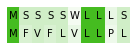

In [51]:
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

fig, ax = plt.subplots(figsize=(2.0, 0.8))
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, symbols_per_line=len(alignments[0])
)
fig.tight_layout()

We can also do some simple analysis on these objects, like determining the sequence identity or calculating the score. For further custom analysis, it can be convenient to have directly the aligned symbols codes instead of the trace.

We might wonder, why we should recalculate the score, when the score has already been directly calculated via align_optimal(). The answer is that we might load an alignment from a FASTA file using get_alignment(), where the score is not provided.

In [52]:
alignment = alignments[0]
print("Score: ", alignment.score)
print("Recalculated score:", align.score(alignment, matrix=matrix))
print("Sequence identity:", align.get_sequence_identity(alignment))
print("Symbols:")
print(align.get_symbols(alignment))
print("symbols codes:")
print(align.get_codes(alignment))

Score:  -3
Recalculated score: -3
Sequence identity: 0.3
Symbols:
[['M', 'S', 'S', 'S', 'S', 'W', 'L', 'L', 'L', 'S'], ['M', 'F', 'V', 'F', 'L', 'V', 'L', 'L', 'P', 'L']]
symbols codes:
[[10 15 15 15 15 18  9  9  9 15]
 [10  4 17  4  9 17  9  9 12  9]]


#### **Advanced sequence alignments**

While the former alignment method returns the optimal alignment of two sequences, it is not recommended to use this method to align a short query sequence (e.g a gene) to an extremely long sequence (e.g. the human genome): The computation time and memory space requirements scale linearly with the length of both sequences, so even if our RAM does not overflow, we might need to wait a very long time for our alignment results.

But there is **another method**: We could **look for local k-mer matches** of the long (reference) sequence and the short (query) sequence and perform a sequence alignment restricted to the position of the match. Although this approach might not give the optimal result in some cases, it works well enough, so that popular programs like BLAST are based on it.

**k-mer**: are all of a sequence's subsequences of length k contained within a biological sequence, e.g. we set k to 3, and then count the whole of the biological sequence. For example, if we have the sequence **AGAT** then we would have four monomers (A, G, A, and T), three 2-mers (AG, GA, AT), two 3-mers (AGA and GAT) and one 4-mer (AGAT). 

Biotite provides a modular system to build such an alignment search method. At least four steps are necessary:

1. **Indexing the reference sequence**: creating an index table mapping k-mers to their position in the reference sequence
2. **Matching the query sequence**: find match positions between this k-mer index table and the k-mers of the query sequence
3. **Alignments at the match positions**: perform gapped alignments restricted to the match positions
4. **Significance evaluation**: evaluate the significance of the created alignments

The following general approach scales well for real world applications, where the reference could be a large genome or where you have a database of thousands of sequences.

**References:**

* Antonio Blanca, Robert S. Harris, David Koslicki, and Paul Medvedev.Journal of Computational Biology.Feb 2022.155-168.{http://doi.org/10.1089/cmb.2021.0431](https://www.liebertpub.com/doi/10.1089/cmb.2021.0431)

In [53]:
query = seq.ProteinSequence("BIQTITE")
reference = seq.ProteinSequence(
    # This toy sequence is adapted from the first sentence of the
    # Wikipedia 'Niobite' article
    "CQLVMBITEALSQCALLEDNIQBITEANDCQLVMBATEISAMINERALGRQVPTHATISANQREQFNIQBIVM"
    #                   ^^^^^^^
    # Here is the 'homologous' mineral
)

**1. Indexing the reference sequence**

In the first step the k-mers of the reference sequence needs to be indexed into a KmerTable. The k-mers (also called words or k-tuples) of a sequence are all overlapping subsequences with a given length k. Indexing means creating a table that maps each k-mer to the position where this k-mer appears in the sequence - similar to the index of a book. Here the first decision needs to be made: Which k is desired? A small k improves the sensitivity, a large k decreases the computation time in the later steps. In this case we choose 3-mers.

In [54]:
# Create a k-mer index table from the k-mers of the reference sequence
kmer_table = align.KmerTable.from_sequences(
    # Use 3-mers
    k=3,
    # Add only the reference sequence to the table
    sequences=[reference],
    # The purpose of the reference ID is to identify the sequence
    ref_ids=[0]
)

The purpose of the reference ID is to identify not only the position of a k-mer in a sequence, but also which sequence is involved, if we add multiple sequences to the table. In this case there is only a single sequence in the table, so the reference ID is arbitrary.

Let’s have a deeper look under the hood: The KmerTable creates a KmerAlphabet that encodes a k-mer symbol, i.e. a tuple of k symbols from the base alphabet, into a k-mer code. Importantly, this k-mer code can be uniquely decoded back into a k-mer symbol.

In [55]:
# Access the internal *k-mer* alphabet.
kmer_alphabet = kmer_table.kmer_alphabet
print("Base alphabet:", kmer_alphabet.base_alphabet)
print("k:", kmer_alphabet.k)
print("k-mer code for 'BIQ':", kmer_alphabet.encode("BIQ"))

Base alphabet: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'B', 'Z', 'X', '*']
k: 3
k-mer code for 'BIQ': 7676


KmerAlphabet can encode all overlapping k-mers of a sequence.

In [56]:
kmer_codes = kmer_alphabet.create_kmers(seq.ProteinSequence("BIQTITE").code)
print("k-mer codes:", kmer_codes)
print("k-mers:")
for kmer in kmer_alphabet.decode_multiple(kmer_codes):
    print("".join(kmer))

k-mer codes: [7676 9535 4429 9400 2119]
k-mers:
BIQ
IQT
QTI
TIT
ITE


When the KmerTable.table is created, it uses KmerAlphabet.create_kmers() to get all k-mers in the sequence and stores for each k-mer the position(s) where the respective k-mer appears.

In [57]:
# Get all positions for the 'ITE' k-mer
for ref_id, position in kmer_table[kmer_alphabet.encode("ITE")]:
    print(position)

6
23


**2. Matching the query sequence**

In the second step we would like to find k-mer matches of our reference KmerTable with the query sequence. A match is a k-mer that appears in both, the table and the query sequence. The KmerTable.match() method iterates over all overlapping k-mers in the query and checks whether the KmerTable has at least one position for this k-mer. If it does, it adds the position in the query and all corresponding positions saved in the KmerTable to the matches.

We see that the 'ITE' of 'BIQTITE' matches the 'ITE' of 'CQLVMBITE' and 'NIQBITE'.

In [58]:
matches = kmer_table.match(query)
# Filter out the reference ID, because we have only one sequence
# in the table anyway
matches = matches[:, [0,2]]
for query_pos, ref_pos in matches:
    print(f"Match at query position {query_pos}, reference position {ref_pos}")
    # Print the reference sequence at the match position including four
    # symbols before and after the matching k-mer
    print("...", reference[ref_pos - 4 : ref_pos + kmer_table.k + 4], "...")
    print()

Match at query position 4, reference position 6
... LVMBITEALSQ ...

Match at query position 4, reference position 23
... NIQBITEANDC ...



**3. Alignments at the match positions**

Now that we have found the match positions, we can perform an alignment restricted to each match position. Currently Biotite offers *three functions* for this purpose: [**align_local_ungapped()**](https://www.biotite-python.org/apidoc/biotite.sequence.align.align_local_ungapped.html#biotite.sequence.align.align_local_ungapped), [**align_local_gapped()**](https://www.biotite-python.org/apidoc/biotite.sequence.align.align_local_gapped.html#biotite.sequence.align.align_local_gapped) and [**align_banded()**](https://www.biotite-python.org/apidoc/biotite.sequence.align.align_banded.html#biotite.sequence.align.align_banded).

**align_local_ungapped() and align_local_gapped() perform fast local alignments expanding from a given seed position, which is typically set to a match position from the previous step**. The alignment stops, if the current similarity score drops a given threshold below the maximum score already found, a technique that is also called X-Drop. While align_local_ungapped() is much faster than align_local_gapped(), it does not insert gaps into the alignment. In contrast **align_banded() performs a local or global alignment**, where the alignment space is restricted to a defined diagonal band, allowing only a certain number of insertions/deletions in each sequence.

The presented methods have in common, that they ideally only traverse through a small fraction of the possible alignment space, allowing them to run much faster than align_optimal(). However they might not find the optimal alignment, if such an alignment would have an intermediate low scoring region or too many gaps in either sequence, respectively. In this tutorial we will focus on using align_banded() to perform a global alignment of our two sequences.

In [59]:
BAND_WIDTH = 4

matrix = SubstitutionMatrix.std_protein_matrix()
alignments = []
for query_pos, ref_pos in matches:
    diagonal = ref_pos - query_pos
    alignment = align.align_banded(
        query, reference, matrix, gap_penalty=-5, max_number=1,
        # Center the band at the match diagonal and extend the band by
        # one half of the band width in each direction
        band=(diagonal - BAND_WIDTH//2, diagonal + BAND_WIDTH//2)
    )[0]
    alignments.append(alignment)

for alignment in alignments:
    print(alignment)
    print("\n")

BIQTITE
LVMBITE


BIQTITE
NIQBITE




**4. Significance evaluation**

We have obtained two alignments, but which one of them is the ‘correct’ one? in this simple example we could simply select the one with the highest similarity score, but this approach is not sound in general: A reference sequence might contain multiple regions, that are homologous to the query, or none at all. A better approach is a **statistical measure, like the BLAST E-value**. It **gives the number of alignments expected by chance with a score at least as high as the score obtained from the alignment of interest**. 

Hence, a value close to zero means a very significant homology. We can calculate the E-value using the **EValueEstimator**, that needs to be initialized with the same scoring scheme used for our alignments. For the sake of simplicity we choose uniform background frequencies for each symbol, but usually you would choose values that reflect the amino acid/nucleotide composition in your sequence database.

In [60]:
estimator = align.EValueEstimator.from_samples(
    seq.ProteinSequence.alphabet, matrix, gap_penalty=-5,
    frequencies=np.ones(len(seq.ProteinSequence.alphabet)),
    # Trade accuracy for a lower runtime
    sample_length=200
)

Now we can calculate the E-value for the alignments. Since we have aligned the query only to the reference sequence shown above, we use its length to calculate the E-value. If you have an entire sequence database you align against, you would take the total sequence length of the database instead.

In [61]:
scores = [alignment.score for alignment in alignments]
evalues = 10 ** estimator.log_evalue(scores, len(query), len(reference))
for alignment, evalue in zip(alignments, evalues):
    print(f"E-value = {evalue:.2e}")
    print(alignment)
    print("\n")

E-value = 5.64e-01
BIQTITE
LVMBITE


E-value = 3.57e-02
BIQTITE
NIQBITE




Finally, we can see that the expected alignment of BIQTITE to NIQBITE is more significant than the unspecific match.

The setup shown here is a very simple one compared to the methods popular software like BLAST use. Since the k-mer matching step is very fast and the gapped alignments take the largest part of the time, you usually want to have additional filters before you trigger a gapped alignment: Commonly a gapped alignment is only started at a match, if there is another match on the same diagonal in proximity and if a fast local ungapped alignment (seed extension) exceeds a defined threshold score. Furthermore, the parameter selection, e.g. the k-mer length, is key to a fast but also sensitive alignment procedure. However, we can find suitable parameters in literature or run benchmarks by ourself to find appropriate parameters for our application.

### **Multiple sequence alignments**

If we want to perform a multiple sequence alignment (MSA), have a look at the [align_multiple() function](https://www.biotite-python.org/apidoc/biotite.sequence.align.align_multiple.html#biotite.sequence.align.align_multiple):

In [62]:
seq1 = seq.ProteinSequence("BIQTITE")
seq2 = seq.ProteinSequence("TITANITE")
seq3 = seq.ProteinSequence("BISMITE")
seq4 = seq.ProteinSequence("IQLITE")
alignment, order, guide_tree, distance_matrix = align.align_multiple(
    [seq1, seq2, seq3, seq4],
    matrix=align.SubstitutionMatrix.std_protein_matrix(),
    gap_penalty=-5,
    terminal_penalty=False
)
print(alignment)

BIQT-ITE
TITANITE
BISM-ITE
-IQL-ITE


**This function is only recommended for strongly related sequences or exotic sequence types**. When high accuracy or computation time matters, other MSA programs deliver better results. External MSA software can accessed via the [biotite.application](https://www.biotite-python.org/apidoc/biotite.application.html#module-biotite.application) subpackage.

### **Sequence features**

Sequence features **describe functional parts of a sequence, like coding regions or regulatory parts**. One popular source to obtain information about sequence features are **GenBank** (for DNA and RNA) and **GenPept** (for peptides) files. As example for sequence features we will work with the GenBank file for the avidin gene (Accession: AJ311647), that we can download from the **NCBI Entrez database**. After downloading we can load the file using the GenBankFile class from biotite.sequence.io.genbank. Similar to the other file classes we have encountered, a [GenBankFile](https://www.biotite-python.org/apidoc/biotite.sequence.io.genbank.GenBankFile.html#biotite.sequence.io.genbank.GenBankFile) provides a low-level interface. In contrast, the [biotite.sequence.io.genbank](https://www.biotite-python.org/apidoc/biotite.sequence.io.genbank.html#module-biotite.sequence.io.genbank) module contains high-level functions to directly obtain useful objects from a GenBankFile object.

In [63]:
import biotite.sequence.io.genbank as gb

file_path = entrez.fetch(
    "AJ311647", gettempdir(), suffix="gb",
    db_name="nuccore", ret_type="gb"
)
file = gb.GenBankFile.read(file_path)
print("Accession:", gb.get_accession(file))
print("Definition:", gb.get_definition(file))

Accession: AJ311647
Definition: Gallus gallus AVD gene for avidin, exons 1-4.


Now that we have loaded the file, we want to have a look at the sequence features. Therefore, we **grab the Annotation from the file. An annotation is the collection of features corresponding to one sequence** (the sequence itself is not included, though). This Annotation can be iterated in order to obtain single Feature objects. Each Feature contains 3 pieces of information: Its feature key (e.g. regulatory or CDS), a dictionary of qualifiers and one or multiple locations on the corresponding sequence. A Location in turn, contains its starting and its ending base/residue position, the strand it is on (only for DNA) and possible location defects (defects will be discussed later). In the next example we will print the keys of the features and their locations:

In [65]:
annotation = gb.get_annotation(file)
for feature in annotation:
    # Convert the feature locations in better readable format
    locs = [str(loc) for loc in sorted(feature.locs, key=lambda l: l.first)]
    print(f"{feature.key:12}   {locs}")

exon           ['98-178 >']
CDS            ['98-178 >', '263-473 >', '899-1019 >', '1107-1152 >']
intron         ['179-262 >']
regulatory     ['26-33 >']
exon           ['263-473 >']
regulatory     ['1215-1220 >']
intron         ['1020-1106 >']
exon           ['1107-1152 >']
mRNA           ['98-178 >', '263-473 >', '899-1019 >', '1107-1152 >']
intron         ['474-898 >']
gene           ['98-1152 >']
sig_peptide    ['98-169 >']
exon           ['899-1019 >']
source         ['1-1224 >']


The '>' characters in the string representations of a location indicate that the location is on the forward strand. Most of the features have only one location, except the mRNA and CDS feature, which have 4 locations joined. When we look at the rest of the features, this makes sense: The gene has 4 exons. Therefore, the mRNA (and consequently the CDS) is composed of these exons.

**TATA box**: 

**Poly-A signal**: d

The two regulatory features are the TATA box and the poly-A signal, as the feature qualifiers make clear:

In [66]:
for feature in annotation:
    if feature.key == "regulatory":
        print(feature.qual["regulatory_class"])

TATA_box
polyA_signal_sequence


Similarily to Alignment objects, we can visualize an Annotation using the [biotite.sequence.graphics subpackage](https://www.biotite-python.org/apidoc/biotite.sequence.graphics.html#module-biotite.sequence.graphics), in a so called feature map. In order to avoid overlaping features, we draw only the CDS feature.

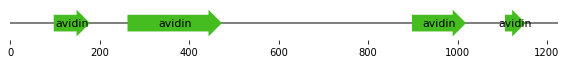

In [67]:
# Get the range of the entire annotation via the *source* feature
for feature in annotation:
    if feature.key == "source":
        # loc_range has exclusive stop
        loc = list(feature.locs)[0]
        loc_range = (loc.first, loc.last+1)
fig, ax = plt.subplots(figsize=(8.0, 1.0))
graphics.plot_feature_map(
    ax,
    seq.Annotation(
        [feature for feature in annotation if feature.key == "CDS"]
    ),
    multi_line=False,
    loc_range=loc_range,
    show_line_position=True
)
fig.tight_layout()

Annotation objects can be indexed with slices, that represent the start and the exclusive stop base/residue of the annotation from which the subannotation is created. All features, that are not in this range, are not included in the subannotation. In order to demonstrate this indexing method, we create a subannotation that includes only features in range of the gene itself (without the regulatory stuff).

In [68]:
# At first we have the find the feature with the 'gene' key
for feature in annotation:
    if feature.key == "gene":
        gene_feature = feature
# Then we create a subannotation from the feature's location
# Since the stop value of the slice is still exclusive,
# the stop value is the position of the last base +1
loc = list(gene_feature.locs)[0]
sub_annot = annotation[loc.first : loc.last +1]
# Print the remaining features and their locations
for feature in sub_annot:
    locs = [str(loc) for loc in sorted(feature.locs, key=lambda l: l.first)]
    print(f"{feature.key:12}   {locs}")

exon           ['98-178 >']
CDS            ['98-178 >', '263-473 >', '899-1019 >', '1107-1152 >']
intron         ['179-262 >']
exon           ['263-473 >']
intron         ['1020-1106 >']
exon           ['1107-1152 >']
mRNA           ['98-178 >', '263-473 >', '899-1019 >', '1107-1152 >']
intron         ['474-898 >']
gene           ['98-1152 >']
sig_peptide    ['98-169 >']
exon           ['899-1019 >']
source         ['98-1152 >']


The regulatory sequences have disappeared in the subannotation. Another interesting thing happened: The location of the source` feature narrowed and is in range of the slice now. This happened, because the feature was truncated: The bases that were not in range of the slice were removed.

Let’s have a closer look into location defects now: A Location instance has a defect, when the feature itself is not directly located in the range of the first to the last base, for example when the exact postion is not known or, as in our case, a part of the feature was truncated. Let’s have a closer look at the location defects of our subannotation:

In [69]:
for feature in sub_annot:
    defects = [str(location.defect) for location
               in sorted(feature.locs, key=lambda l: l.first)]
    print(f"{feature.key:12}   {defects}")

exon           ['Defect.NONE']
CDS            ['Defect.NONE', 'Defect.NONE', 'Defect.NONE', 'Defect.NONE']
intron         ['Defect.NONE']
exon           ['Defect.NONE']
intron         ['Defect.NONE']
exon           ['Defect.NONE']
mRNA           ['Defect.BEYOND_LEFT', 'Defect.NONE', 'Defect.NONE', 'Defect.BEYOND_RIGHT']
intron         ['Defect.NONE']
gene           ['Defect.BEYOND_RIGHT|BEYOND_LEFT']
sig_peptide    ['Defect.NONE']
exon           ['Defect.NONE']
source         ['Defect.MISS_RIGHT|MISS_LEFT']


The class [Location.Defect](https://www.biotite-python.org/apidoc/biotite.sequence.Location.html#biotite.sequence.Location.Defect) is a Flag. This means that multiple defects can be combined to one value. NONE means that the location has no defect, which is true for most of the features. The source feature has a defect - a combination of MISS_LEFT and MISS_RIGHT. MISS_LEFT is applied, if a feature was truncated before the first base, and MISS_RIGHT is applied, if a feature was truncated after the last base. Since source` was truncated from both sides, the combination is applied. gene has the defect values BEYOND_LEFT and BEYOND_RIGHT. These defects already appear in the GenBank file, since the gene is defined as the unit that is transcribed into one (pre-)mRNA. As the transcription starts somewhere before the start of the coding region and the exact start location is not known, BEYOND_LEFT is applied. In an analogous way, the transcription does stop somewhere after the coding region (at the terminator signal). Hence, BEYOND_RIGHT is applied. These two defects are also reflected in the mRNA feature.

### **Annotated sequences**

An [AnnotatedSequence](https://www.biotite-python.org/apidoc/biotite.sequence.AnnotatedSequence.html#biotite.sequence.AnnotatedSequence) is like an annotation, but the sequence is included this time. Since our *GenBank file* contains the sequence corresponding to the feature table, we can directly obtain the AnnotatedSequence.

In [70]:
annot_seq = gb.get_annotated_sequence(file)
print("Same annotation as before?", (annotation == annot_seq.annotation))
print(annot_seq.sequence[:60], "...")

Same annotation as before? True
ACTGGGCAGAGTCAGTGCTGGAAGCAATMAAAAGGCGAGGGAGCAGGCAGGGGTGAGTCC ...


When indexing an AnnotatedSequence with a slice, the index is applied to the [Annotation](https://www.biotite-python.org/apidoc/biotite.sequence.Annotation.html#biotite.sequence.Annotation) and the [Sequence](https://www.biotite-python.org/apidoc/biotite.sequence.Sequence.html#biotite.sequence.Sequence). While the Annotation handles the index as shown before, the Sequence is indexed based on the sequence start value (usually 1).

In [71]:
print("Sequence start before indexing:", annot_seq.sequence_start)
for feature in annot_seq.annotation:
    if feature.key == "regulatory" \
        and feature.qual["regulatory_class"] == "polyA_signal_sequence":
            polya_feature = feature
loc = list(polya_feature.locs)[0]
# Get annotated sequence containing only the poly-A signal region
poly_a = annot_seq[loc.first : loc.last +1]
print("Sequence start after indexing:", poly_a.sequence_start)
print(poly_a.sequence)

Sequence start before indexing: 1
Sequence start after indexing: 1215
AATAAA


Here we get the poly-A signal Sequence 'AATAAA'. Observe the sequence start has shifted to the start of the slice index (the first base of the regulatory feature).

**Note**: Since AnnotatedSequence objects use base position indices and Sequence objects use array position indices, you will get different results for annot_seq[n:m].sequence and annot_seq.sequence[n:m].

There is also a convenient way to obtain the sequence corresponding to a feature, even if the feature contains multiple locations or a location is on the reverse strand: Simply use a [Feature](https://www.biotite-python.org/apidoc/biotite.sequence.Feature.html#biotite.sequence.Feature) object (in this case the [CDS feature](https://www.ddbj.nig.ac.jp/ddbj/cds-e.html)) as index.

**CDS Feature**: Most protein sequences are derived from translations of [CoDing Sequence (CDS)](https://www.uniprot.org/help/cds_protein_definition) derived from gene predictions. A CoDing Sequence (CDS) is a region of DNA or RNA whose sequence determines the sequence of amino acids in a protein. 

In [72]:
for feature in annot_seq.annotation:
    if feature.key == "CDS":
        cds_feature = feature
cds_seq = annot_seq[cds_feature]
print(cds_seq[:60], "...")

ATGGTGCACGCAACCTCCCCGCTGCTGCTGCTGCTGCTGCTCAGCCTGGCTCTGGTGGCT ...


Now we can translate the sequence and compare it with the translation given by the CDS feature. But before we can do that, we have to prepare the data: The DNA sequence uses an ambiguous alphabet due to the nasty 'M' at position 28 of the original sequence, we have to remove the stop symbol after translation and we need to remove the whitespace characters in the translation given by the CDS feature.

In [73]:
# To make alphabet unambiguous we create a new NucleotideSequence
# containing only the CDS portion, which is unambiguous
# Thus, the resulting NucleotideSequence has an unambiguous alphabet
cds_seq = seq.NucleotideSequence(cds_seq)
# Now we can translate the unambiguous sequence.
prot_seq = cds_seq.translate(complete=True)
print(prot_seq[:60], "...")
print(
    "Are the translated sequences equal?",
    # Remove stops of our translation
    (str(prot_seq.remove_stops()) ==
    # Remove whitespace characters from translation given by CDS feature
    cds_feature.qual["translation"].replace(" ", ""))
)

MVHATSPLLLLLLLSLALVAPGLSARKCSLTGKWDNDLGSNMTIGAVNSKGEFTGTYTTA ...
Are the translated sequences equal? True


### **Phylogenetic and guide trees**

Trees have an important role in bioinformatics, as they are used to guide multiple sequence alignments or to create phylogenies.

In Biotite such a tree is represented by the [Tree](https://www.biotite-python.org/apidoc/biotite.sequence.phylo.Tree.html#biotite.sequence.phylo.Tree) class in the [biotite.sequence.phylo](https://www.biotite-python.org/apidoc/biotite.sequence.phylo.html#module-biotite.sequence.phylo) package. A tree is rooted, that means each tree node has at least one child, or none in case of leaf nodes. Each node in a tree is represented by a [TreeNode](https://www.biotite-python.org/apidoc/biotite.sequence.phylo.TreeNode.html#biotite.sequence.phylo.TreeNode). When a TreeNode is created, you have to provide either child nodes and their distances to this node (intermediate node) or a reference index (leaf node). This reference index is dependent on the context and can refer to anything: sequences, organisms, etc.

The childs and the reference index cannot be changed after object creation. Also the parent can only be set once - when the node is used as child in the creation of a new node.

In [74]:
import biotite.sequence.phylo as phylo

# The reference objects
fruits = ["Apple", "Pear", "Orange", "Lemon", "Banana"]
# Create nodes
apple  = phylo.TreeNode(index=fruits.index("Apple"))
pear   = phylo.TreeNode(index=fruits.index("Pear"))
orange = phylo.TreeNode(index=fruits.index("Orange"))
lemon  = phylo.TreeNode(index=fruits.index("Lemon"))
banana = phylo.TreeNode(index=fruits.index("Banana"))
intermediate1 = phylo.TreeNode(
    children=(apple, pear), distances=(2.0, 2.0)
)
intermediate2 = phylo.TreeNode((orange, lemon), (1.0, 1.0))
intermediate3 = phylo.TreeNode((intermediate2, banana), (2.0, 3.0))
root = phylo.TreeNode((intermediate1, intermediate3), (2.0, 1.0))
# Create tree from root node
tree = phylo.Tree(root=root)
# Trees can be converted into Newick notation
print("Tree:", tree.to_newick(labels=fruits))
# Distances can be omitted
print(
    "Tree w/o distances:",
    tree.to_newick(labels=fruits, include_distance=False)
)
# Distances can be measured
distance = tree.get_distance(fruits.index("Apple"), fruits.index("Banana"))
print("Distance Apple-Banana:", distance)

Tree: ((Apple:2.0,Pear:2.0):2.0,((Orange:1.0,Lemon:1.0):2.0,Banana:3.0):1.0):0.0;
Tree w/o distances: ((Apple,Pear),((Orange,Lemon),Banana));
Distance Apple-Banana: 8.0


Plot a tree as dendrogram

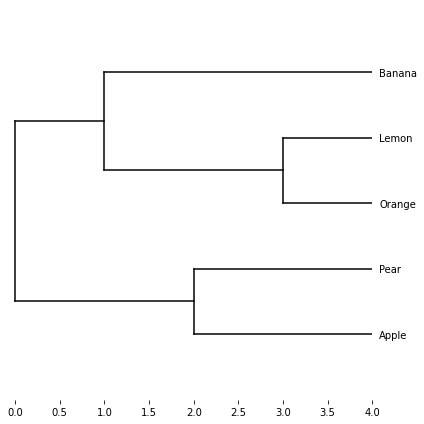

In [75]:
fig, ax = plt.subplots(figsize=(6.0, 6.0))
graphics.plot_dendrogram(ax, tree, labels=fruits)
fig.tight_layout()

**From distances to trees**: When we want to create a Tree from distances obtained for example from sequence alignments, we can use the **UPGMA or neighbour joining algorithm**.

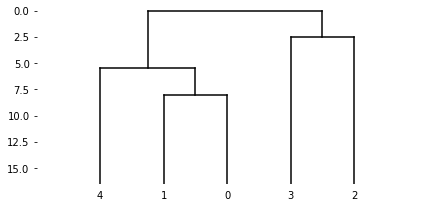

In [76]:
distances = np.array([
    [ 0, 17, 21, 31, 23],
    [17, 0,  30, 34, 21],
    [21, 30, 0,  28, 39],
    [31, 34, 28,  0, 43],
    [23, 21, 39, 43,  0]
])
tree = phylo.upgma(distances)
fig, ax = plt.subplots(figsize=(6.0, 3.0))
graphics.plot_dendrogram(ax, tree, orientation="top")
fig.tight_layout()

### **3. Structure Subpackage**

[biotite.structure](https://www.biotite-python.org/apidoc/biotite.structure.html#module-biotite.structure) is a Biotite subpackage for handling molecular structures - enabling 3D visualisations. This subpackage enables efficient and easy handling of protein structure data by representing atom attributes in NumPy ndarray objects. These atom attributes include so called annotations (polypetide chain id, residue id, residue name, hetero residue information, atom name, element, etc.) and the atom coordinates.

The package contains three central types: [Atom](https://www.biotite-python.org/apidoc/biotite.structure.Atom.html#biotite.structure.Atom), [AtomArray](https://www.biotite-python.org/apidoc/biotite.structure.AtomArray.html#biotite.structure.AtomArray) and [AtomArrayStack](https://www.biotite-python.org/apidoc/biotite.structure.AtomArrayStack.html#biotite.structure.AtomArrayStack). An Atom contains data for a single atom, an AtomArray stores data for an entire model and AtomArrayStack stores data for multiple models, where each model contains the same atoms but differs in the atom coordinates. Both, AtomArray and AtomArrayStack, store the attributes in NumPy arrays. This approach has multiple advantages:

1. Convenient selection of atoms in a structure by using NumPy style indexing
2. Fast calculations on structures using C-accelerated ndarray operations
3. Simple implementation of custom calculations

Based on the implementation using **ndarray** objects, this package also contains functions for structure analysis and manipulation.

**Note**: The universal length unit in Biotite is Å. This includes coordinates, distances, surface areas, etc.

####**Creating structures**

Let’s begin by constructing some atoms:

In [77]:
import biotite.structure as struc

atom1 = struc.Atom([0,0,0], chain_id="A", res_id=1, res_name="GLY",
                   atom_name="N", element="N")
atom2 = struc.Atom([0,1,1], chain_id="A", res_id=1, res_name="GLY",
                   atom_name="CA", element="C")
atom3 = struc.Atom([0,0,2], chain_id="A", res_id=1, res_name="GLY",
                   atom_name="C", element="C")

The first parameter are the coordinates (internally converted into an ndarray), the other parameters are annotations. The annotations shown in this example are mandatory: The **chain ID, residue ID, residue name, insertion code, atom name, element** and **whether the atom is not in protein/nucleotide chain (hetero)**. If you miss one of these, they will get a default value. The mandatory annotation categories are originated in ATOM and HETATM records in the PDB format. The **description of each annotation can be viewed in the API reference**. Additionally, we can specify an arbitrary amount of custom annotations, like B-factors, charge, etc. In most cases we won’t work with Atom instances and in even fewer cases Atom instances are created as it is done in the above example.

If we want to work with an entire molecular structure, containing an arbitrary amount of atoms, we have to use so called atom arrays. An atom array can be seen as an array of atom instances (hence the name). But instead of storing Atom instances in a list, an AtomArray instance contains one ndarray for each annotation and the coordinates. In order to see this in action, we first have to create an array from the atoms we constructed before. Then we can access the annotations and coordinates of the atom array simply by specifying the attribute.

In [78]:
import numpy as np

array = struc.array([atom1, atom2, atom3])
print("Chain ID:", array.chain_id)
print("Residue ID:", array.res_id)
print("Atom name:", array.atom_name)
print("Coordinates:", array.coord)
print()
print(array)

Chain ID: ['A' 'A' 'A']
Residue ID: [1 1 1]
Atom name: ['N' 'CA' 'C']
Coordinates: [[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 2.]]

    A       1  GLY N      N         0.000    0.000    0.000
    A       1  GLY CA     C         0.000    1.000    1.000
    A       1  GLY C      C         0.000    0.000    2.000


The array() builder function takes any iterable object containing Atom instances. If we wanted to, we could use another AtomArray, which functions also as an iterable object of Atom objects. An alternative way of constructing an array would be creating an AtomArray by using its constructor, which fills the annotation arrays and coordinates with the type respective zero value. In our example all annotation arrays have a length of 3, since we used 3 atoms to create it. A structure containing n atoms is represented by annotation arrays of length n and coordinates of shape (n,3). As the annotations and coordinates are simply ndarray objects, they can be edited in the same manner.

In [79]:
array.chain_id[:] = "B"
array.coord[array.element == "C", 0] = 42
# It is also possible to replace an entire annotation with another array
array.res_id = np.array([1,2,3])
print(array)

    B       1  GLY N      N         0.000    0.000    0.000
    B       2  GLY CA     C        42.000    1.000    1.000
    B       3  GLY C      C        42.000    0.000    2.000


####**Loading structures from files**

Usually structures are not built from scratch, but they are read from a file. Probably the most popular structure file format is the PDB format. For our purpose, we will work on a protein structure as small as possible, namely the miniprotein TC5b (PDB: 1L2Y). The structure of this 20-residue protein (304 atoms) has been elucidated via NMR. Thus, the corresponding PDB file consists of multiple (namely 38) models, each showing another conformation.

At first we load the structure from a [PDB file](https://www.biotite-python.org/apidoc/biotite.structure.io.pdb.PDBFile.html#biotite.structure.io.pdb.PDBFile) via the class PDBFile in the subpackage [biotite.structure.io.pdb](https://www.biotite-python.org/apidoc/biotite.structure.io.pdb.html#module-biotite.structure.io.pdb).

In [80]:
from tempfile import gettempdir, NamedTemporaryFile
import biotite.structure.io.pdb as pdb
import biotite.database.rcsb as rcsb

pdb_file_path = rcsb.fetch("1l2y", "pdb", gettempdir())
pdb_file = pdb.PDBFile.read(pdb_file_path)
tc5b = pdb_file.get_structure()
print(type(tc5b).__name__)
print(tc5b.stack_depth())
print(tc5b.array_length())
print(tc5b.shape)

AtomArrayStack
38
304
(38, 304)


The method [PDBFile.get_structure()](https://www.biotite-python.org/apidoc/biotite.structure.io.pdb.PDBFile.html#biotite.structure.io.pdb.PDBFile.get_structure) returns an atom array stack unless the model parameter is specified, even if the file contains only one model. Alternatively, the module level function [get_structure()](https://www.biotite-python.org/apidoc/biotite.structure.io.pdb.get_structure.html#biotite.structure.io.pdb.get_structure) can be used. The following example shows how to write an atom array or stack back into a PDB file:

In [81]:
pdb_file = pdb.PDBFile()
pdb_file.set_structure(tc5b)
temp_file = NamedTemporaryFile(suffix=".pdb", delete=False)
pdb_file.write(temp_file.name)
temp_file.close()

It is **recommended to use the modern PDBx/mmCIF format** in favor of the PDB format. It solves limitations of the PDB format, that arise from the column restrictions. Furthermore, much more additional information is stored in these files.

In contrast to PDB files, **Biotite can read the entire content of PDBx/mmCIF files**, which can be accessed in a dictionary like manner. At first, we read the file similarily to before, but this time we use the PDBxFile class.

**Crystallographic Information File [(CIF)](https://www.ccdc.cam.ac.uk/Community/depositastructure/cifsyntax/)**: is the standard format for storing crystallographic structural data. CIF information has a specific structure or format that needs to be followed to allow crystallographic programs to read the file.   

In [82]:
import biotite.structure.io.pdbx as pdbx

cif_file_path = rcsb.fetch("1l2y", "cif", gettempdir())
cif_file = pdbx.PDBxFile.read(cif_file_path)

Now we can access the data like a dictionary of dictionaries.

In [83]:
print(cif_file["1L2Y", "audit_author"]["name"])

['Neidigh, J.W.' 'Fesinmeyer, R.M.' 'Andersen, N.H.']


The first index contains the data block and the category name. The data block could be omitted, since there is only one block in the file. This returns a dictionary. If the category is in a loop_ category, i.e. the category’s fields have a list of values, like in this case, the dictionary contains ndarray objects of type string as values, otherwise the dictionary contains strings directly. The second index specifies the name of the subcategory, which is used as key in this dictionary and returns the corresponding ndarray. Setting/adding a category in the file is done in a similar way:

In [84]:
cif_file["audit_author"] = {
    "name" : ["Doe, Jane", "Doe, John"],
    "pdbx_ordinal" : ["1","2"]
}

In most applications only the structure itself (stored in the atom_site category) is relevant. [get_structure()](https://www.biotite-python.org/apidoc/biotite.structure.io.pdbx.get_structure.html#biotite.structure.io.pdbx.get_structure) and [set_structure()](https://www.biotite-python.org/apidoc/biotite.structure.io.pdbx.set_structure.html#biotite.structure.io.pdbx.set_structure) are convenience functions that are used to convert the atom_site category into an atom array (stack) and vice versa.

In [85]:
tc5b = pdbx.get_structure(cif_file)
# Do some fancy stuff
pdbx.set_structure(cif_file, tc5b)

get_structure() creates automatically an AtomArrayStack, even if the file actually contains only a single model. If we like to have an AtomArray instead, we have to specifiy the model parameter.

If we **want to parse a large batch of structure files or we have to load very large structure files, the usage of PDB or mmCIF files might be too slow** for our requirements. In this case might want to use **MMTF files**. 

MMTF files describe structures just like PDB and mmCIF files, but they are binary. This circumstance increases the downloading and parsing speed by several multiples. The usage is similar to PDBxFile: The MMTFFile class decodes the file and makes it raw information accessible. Via get_structure() the data can be loaded into an atom array (stack) and set_structure() is used to save it back into a MMTF file.

In [86]:
import numpy as np
import biotite.structure.io.mmtf as mmtf

mmtf_file_path = rcsb.fetch("1l2y", "mmtf", gettempdir())
mmtf_file = mmtf.MMTFFile.read(mmtf_file_path)
stack = mmtf.get_structure(mmtf_file)
array = mmtf.get_structure(mmtf_file, model=1)
# Do some fancy stuff
mmtf.set_structure(mmtf_file, array)

A more low level access to MMTF files is also possible: **An MMTF file is structured as dictionary, with each key being a structural feature like the coordinates, the residue ID or the secondary structure**. Most of the fields are encoded to reduce to size of the file, but the whole decoding process is handled automatically by the MMTFFile class: If a field is encoded the decoded ndarray is returned, otherwise the value is directly returned. A list of all MMTF fields (keys) can be found in the specification. The implementation of MMTFFile decodes the encoded fields only when we need them, so no computation time is wasted on fields we are not interested in.

In [87]:
# Field is not encoded
print(mmtf_file["title"])
# Field is encoded and is automatically decoded
print(mmtf_file["groupIdList"])

NMR Structure of Trp-Cage Miniprotein Construct TC5b
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Setting fields of an MMTF file works in an analogous way for values, that should not be encoded. The situation is a little more complex for arrays, that should be encoded: Since arbitrarily named fields can be set in the file, MMTFFile does not know which codec to use for encoding your array. Hence, you need to use the MMTFFile.set_array() function.

In [88]:
mmtf_file["title"] = "Some other title"
print(mmtf_file["title"])
# Determine appropriate codec from the codec used originally
mmtf_file.set_array(
    "groupIdList",
    np.arange(20,40),
    codec=mmtf_file.get_codec("groupIdList"))
print(mmtf_file["groupIdList"])

Some other title
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


**An alternative file format for storing and loading atom arrays and stacks even faster, is the NPZ format**. The big disadvantage is that the format is Biotite-exclusive: No other software will be able to read these files. These are simple binary files, that are used to store NumPy arrays. In case of atom arrays and stacks, the annotation arrays and coordinates are written/read to/from npz files via the NpzFile class. Since no expensive data conversion has to be performed, this format is the fastest way to save and load atom arrays and stacks.

In [89]:
import biotite.structure.io.npz as npz

file = npz.NpzFile()
file.set_structure(array)
reloaded_array = file.get_structure()

Other file formats are supported, list detailed in [biotite.structure.io](https://www.biotite-python.org/apidoc/biotite.structure.io.html#module-biotite.structure.io) function.

There are two convenient functions for loading and saving atom arrays or stacks, unifying the forementioned file formats: [load_structure()](https://www.biotite-python.org/apidoc/biotite.structure.io.load_structure.html#biotite.structure.io.load_structure) takes a file path and outputs an array (or stack, if the file contains multiple models). Internally, this function uses the appropriate File class, depending on the file format. The analogous [save_structure()](https://www.biotite-python.org/apidoc/biotite.structure.io.save_structure.html#biotite.structure.io.save_structure) function provides a shortcut for writing to structure files. The desired file format is inferred from the the extension of the provided file name.

In [90]:
import biotite.structure.io as strucio

stack_from_pdb = strucio.load_structure(pdb_file_path)
stack_from_cif = strucio.load_structure(cif_file_path)
temp_file = NamedTemporaryFile(suffix=".cif", delete=False)
strucio.save_structure(temp_file.name, stack_from_pdb)
temp_file.close()

####**Reading trajectory files**

If the package [**MDtraj**](https://www.mdtraj.org/1.9.8.dev0/index.html) is installed, Biotite provides a read/write interface for different trajectory file formats. All supported trajectory formats have in common, that they store only coordinates. These can be extracted as **ndarray** with the **get_coord()** method.

**MDTraj**: is a python library that allows users to **manipulate molecular dynamics (MD) trajectories**. 

In [91]:
! pip install mdtraj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 38.1 MB 156 kB/s 
     |████████████████████████████████| 98 kB 6.5 MB/s 
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp37-cp37m-linux_x86_64.whl size=5682305 sha256=73902639842ab45adcd0aad6d27b041824d1b87545fc9571a3a976883eb055d7
  Stored in directory: /root/.cache/pip/wheels/6f/84/9d/6854e5264a4423209de26a6e4b34d13750289c72ba0439bbfd
Successfully built mdtraj


In [92]:
from tempfile import NamedTemporaryFile
import requests
import biotite.structure.io.xtc as xtc

# Download 1L2Y as XTC file for demonstration purposes
temp_xtc_file = NamedTemporaryFile("wb", suffix=".xtc", delete=False)
response = requests.get(
    "https://raw.githubusercontent.com/biotite-dev/biotite/master/"
    "tests/structure/data/1l2y.xtc"
)
temp_xtc_file.write(response.content)

traj_file = xtc.XTCFile.read(temp_xtc_file.name)
coord = traj_file.get_coord()
print(coord.shape)

(38, 304, 3)


If only an excerpt of frames is desired, the behavior of the **read()** function can be customized with the start, stop and step parameters.

In [93]:
# Read only every second frame
traj_file = xtc.XTCFile.read(temp_xtc_file.name, step=2)
coord = traj_file.get_coord()
print(coord.shape)

(19, 304, 3)


In order to extract an entire structure, i.e. an **AtomArrayStack**, from a trajectory file, a template structure must be given, since the trajectory file contains only coordinate information.

In [94]:
import biotite.database.rcsb as rcsb
import biotite.structure.io.mmtf as mmtf

mmtf_file_path = rcsb.fetch("1l2y", "mmtf", gettempdir())
mmtf_file = mmtf.MMTFFile.read(mmtf_file_path)
template = mmtf.get_structure(mmtf_file, model=1)

traj_file = xtc.XTCFile.read(temp_xtc_file.name)
trajectory = traj_file.get_structure(template)

temp_xtc_file.close()

####**Array indexing and filtering**

Atom arrays and stacks can be indexed in a similar way a ndarray is indexed. In fact, the index is propagated to the coordinates and the annotation arrays. Therefore, all NumPy compatible types of indices can be used, like boolean arrays, index arrays/lists, slices and, of course, integer values. Integer indices have a special role here, as they reduce the dimensionality of the data type: Indexing an AtomArrayStack with an integer results in an AtomArray at the specified frame, indexing an AtomArray with an integer yields the specified Atom. Iterating over arrays and stacks reduces the dimensionality in an analogous way. Let’s demonstrate indexing with the help of the structure of TC5b.

In [95]:
from tempfile import gettempdir
import biotite.structure as struc
import biotite.database.rcsb as rcsb
import biotite.structure.io as strucio

file_path = rcsb.fetch("1l2y", "mmtf", gettempdir())
stack = strucio.load_structure(file_path)
print(type(stack).__name__)
print(stack.shape)
# Get the third model
array = stack[2]
print(type(array).__name__)
print(array.shape)
# Get the fifth atom
atom = array[4]
print(type(atom).__name__)
print(atom.shape)

AtomArrayStack
(38, 304)
AtomArray
(304,)
Atom
()


load_structure() gives us an AtomArrayStack. The first indexing step reduces the stack to an atom array and the second indexing step reduces the array to a single atom. The shape attribute gives the number of models and atoms, similarly to the shape attribute of ndarray objects. Alternatively, the stack_depth() or array_length() methods can be used to get the number of models or atoms, respectively.

The following code section shows some examples for how an atom array can be indexed.

In [96]:
# Get the first atom
atom = array[0]
# Get a subarray containing the first and third atom
subarray = array[[0,2]]
# Get a subarray containing a range of atoms using slices
subarray = array[100:200]
# Filter all carbon atoms in residue 1
subarray = array[(array.element == "C") & (array.res_id == 1)]
# Filter all atoms where the X-coordinate is smaller than 2
subarray = array[array.coord[:,0] < 2]

An atom array stack can be indexed in a similar way, with the difference, that the index specifies the frame(s).

In [97]:
# Get an atom array from the first model
subarray = stack[0]
# Get a substack containing the first 10 models
substack = stack[:10]

Stacks also have the speciality, that they can handle 2-dimensional indices, where the first dimension specifies the frame(s) and the second dimension specifies the atom(s).

In [98]:
# Get the first 100 atoms from the third model
subarray = stack[2, :100]
# Get the first 100 atoms from the models 3, 4 and 5
substack = stack[2:5, :100]
# Get the first atom in the second model
atom = stack[1,0]
# Get a stack containing arrays containing only the first atom
substack = stack[:, 0]

Furthermore, biotite.structure contains advanced filters, that create boolean masks from an atom array using specific criteria. Here is a small example.

In [99]:
backbone = array[struc.filter_backbone(array)]
print(backbone.atom_name)

['N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA'
 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N'
 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C'
 'N' 'CA' 'C' 'N' 'CA' 'C' 'N' 'CA' 'C']


Look at the [CellList](https://www.biotite-python.org/apidoc/biotite.structure.CellList.html#biotite.structure.CellList) class to know which atoms are in proximity to specific coordinates.

####**Representing bonds**

We can also use a [**BondList**](https://www.biotite-python.org/apidoc/biotite.structure.BondList.html#biotite.structure.BondList) to describe chemical bonds, like atom arrays which describe the coordinates and annotaions of atoms.

* **Example**: atom array contains four atoms: N, CA, C and CB. CA is a central atom that is connected to N, C and CB. A BondList is created by passing a ndarray containing pairs of integers, where each integer represents an index in a corresponding atom array. The pairs indicate which atoms share a bond. Additionally, it is required to specify the number of atoms in the atom array.

In [100]:
from tempfile import gettempdir
import biotite.structure as struc

array = struc.array([
    struc.Atom([0,0,0], atom_name="N"),
    struc.Atom([0,0,0], atom_name="CA"),
    struc.Atom([0,0,0], atom_name="C"),
    struc.Atom([0,0,0], atom_name="CB")
])
print("Atoms:", array.atom_name)
bond_list = struc.BondList(
    array.array_length(),
    np.array([[1,0], [1,2], [1,3]])
)
print("Bonds (indices):")
print(bond_list.as_array())
print("Bonds (atoms names):")
print(array.atom_name[bond_list.as_array()[:, :2]])
ca_bonds, ca_bond_types = bond_list.get_bonds(1)
print("Bonds of CA:", array.atom_name[ca_bonds])

Atoms: ['N' 'CA' 'C' 'CB']
Bonds (indices):
[[0 1 0]
 [1 2 0]
 [1 3 0]]
Bonds (atoms names):
[['N' 'CA']
 ['CA' 'C']
 ['CA' 'CB']]
Bonds of CA: ['N' 'C' 'CB']


When we look at the internal ndarray (as given by BondList.as_array()), we see a third column containing zeros. This column describes each bond with values from the BondType enum: 0 corresponds to BondType.ANY, which means that the type of the bond is undefined. This makes sense, since we did not define the bond types, when we created the bond list. The other thing that has changed is the index order: Each bond is sorted so that the index with the lower index is the first element.

Although a BondList uses a ndarray under the hood, indexing works a little bit different: The indexing operation is not applied to the internal ndarray, instead it behaves like the same indexing operation was applied to a corresponding atom array: The bond list adjusts its indices so that they still point to the same atoms as before. Bonds that involve at least one atom, that has been removed, are deleted as well. We will try that by deleting the C atom.

In [101]:
mask = (array.atom_name != "C")
sub_array = array[mask]
sub_bond_list = bond_list[mask]
print("Atoms:", sub_array.atom_name)
print("Bonds (indices):")
print(sub_bond_list.as_array())
print("Bonds (atoms names):")
print(sub_array.atom_name[sub_bond_list.as_array()[:, :2]])

Atoms: ['N' 'CA' 'CB']
Bonds (indices):
[[0 1 0]
 [1 2 0]]
Bonds (atoms names):
[['N' 'CA']
 ['CA' 'CB']]


As we see, the the bonds involving the C (only a single one) are removed and the remaining indices are shifted.

####**Connecting atoms and bonds**

We do not have to index the atom array and the bond list separately. We can also associate a BondList to an AtomArray via the bonds attribute. If no BondList is associated, bonds is None. Every time the atom array is indexed, the index is also applied to the associated bond list. The same behavior applies to concatenations also.

In [102]:
array.bonds = bond_list
sub_array = array[array.atom_name != "C"]
print("Bonds (atoms names):")
print(sub_array.atom_name[sub_array.bonds.as_array()[:, :2]])

Bonds (atoms names):
[['N' 'CA']
 ['CA' 'CB']]


**Note**: some functionalities in Biotite require that the input structure has an associated BondList.

####**Reading and writing bonds**

Up to now the bond information has been created manually, which is infeasible for larger molecules. Instead bond information can be loaded from and saved to some file formats, including **MMTF and MOL files**. We’ll try that on the structure of TC5b and look at the bond information of the third residue, a tyrosine.

In [104]:
import biotite.structure.io.mmtf as mmtf

file_path = rcsb.fetch("1l2y", "mmtf", gettempdir())
mmtf_file = mmtf.MMTFFile.read(file_path)
# Essential: set the 'include_bonds' parameter to true
stack = mmtf.get_structure(mmtf_file, include_bonds=True)
tyrosine = stack[:, (stack.res_id == 3)]
print("Bonds (indices):")
print(tyrosine.bonds)
print("Bonds (atoms names):")
print(tyrosine.atom_name[tyrosine.bonds.as_array()[:, :2]])

Bonds (indices):
[[ 0  1  1]
 [ 1  2  1]
 [ 2  3  2]
 [ 1  4  1]
 [ 4  5  1]
 [ 5  6  2]
 [ 5  7  1]
 [ 6  8  1]
 [ 7  9  2]
 [ 8 10  2]
 [ 9 10  1]
 [10 11  1]
 [ 0 12  1]
 [ 1 13  1]
 [ 4 14  1]
 [ 4 15  1]
 [ 6 16  1]
 [ 7 17  1]
 [ 8 18  1]
 [ 9 19  1]
 [11 20  1]]
Bonds (atoms names):
[['N' 'CA']
 ['CA' 'C']
 ['C' 'O']
 ['CA' 'CB']
 ['CB' 'CG']
 ['CG' 'CD1']
 ['CG' 'CD2']
 ['CD1' 'CE1']
 ['CD2' 'CE2']
 ['CE1' 'CZ']
 ['CE2' 'CZ']
 ['CZ' 'OH']
 ['N' 'H']
 ['CA' 'HA']
 ['CB' 'HB2']
 ['CB' 'HB3']
 ['CD1' 'HD1']
 ['CD2' 'HD2']
 ['CE1' 'HE1']
 ['CE2' 'HE2']
 ['OH' 'HH']]


Since we loaded the bond information from a MMTF file, the bond types are also defined: Here we have both, BondType.SINGLE and BondType.DOUBLE bonds (1 and 2, respectively).

Bond information can also be automatically inferred from an AtomArray or AtomArrayStack: connect_via_residue_names() is able to connect atoms in all residues that appear in the Chemical Component Dictionary, comprising every molecule that appears in any PDB entry. In contrast, connect_via_distances() uses only distances between atoms to infer the bonds. However, this function creates only BondType.ANY bonds and might connect wrong atoms in rare cases. Since both functions have the mentioned limitations it is usually better to read bond information directly from file, if available.

In [105]:
import biotite.structure.io.pdb as pdb

file_path = rcsb.fetch("1l2y", "pdb", gettempdir())
pdb_file = pdb.PDBFile.read(file_path)
stack = pdb_file.get_structure()
stack.bonds = struc.connect_via_residue_names(stack)
tyrosine = stack[:, (stack.res_id == 3)]
print("Bonds (indices):")
print(tyrosine.bonds)
print("Bonds (atoms names):")
print(tyrosine.atom_name[tyrosine.bonds.as_array()[:, :2]])

Bonds (indices):
[[ 0  1  1]
 [ 0 12  1]
 [ 1  2  1]
 [ 1  4  1]
 [ 1 13  1]
 [ 2  3  2]
 [ 4  5  1]
 [ 4 14  1]
 [ 4 15  1]
 [ 5  6  6]
 [ 5  7  5]
 [ 6  8  5]
 [ 6 16  1]
 [ 7  9  6]
 [ 7 17  1]
 [ 8 10  6]
 [ 8 18  1]
 [ 9 10  5]
 [ 9 19  1]
 [10 11  1]
 [11 20  1]]
Bonds (atoms names):
[['N' 'CA']
 ['N' 'H']
 ['CA' 'C']
 ['CA' 'CB']
 ['CA' 'HA']
 ['C' 'O']
 ['CB' 'CG']
 ['CB' 'HB2']
 ['CB' 'HB3']
 ['CG' 'CD1']
 ['CG' 'CD2']
 ['CD1' 'CE1']
 ['CD1' 'HD1']
 ['CD2' 'CE2']
 ['CD2' 'HD2']
 ['CE1' 'CZ']
 ['CE1' 'HE1']
 ['CE2' 'CZ']
 ['CE2' 'HE2']
 ['CZ' 'OH']
 ['OH' 'HH']]


####**Simulation boxes and unit cells**

Depending on the source of the macromolecular structure, there might be an associated unit cell or simulation box. In this package such boxes are represented by (3,3)-shaped ndarray objects, where each element in the array is one of the three vectors spanning the box or unit cell. Let’s create an **orthorhombic box** from the vector lengths and the angles between the vectors.

**Orthorhombic box**: in crystallography, the orthorhombic crystal system is one of the 7 crystal systems. Orthorhombic lattices result from stretching a cubic lattice along two of its orthogonal pairs by two different factors, resulting in a rectangular prism with a rectangular base (a by b) and height (c), such that a, b, and c are distinct. All three bases intersect at 90° angles, so the three lattice vectors remain mutually orthogonal [Wikipedia](https://en.wikipedia.org/wiki/Orthorhombic_crystal_system). 

In [106]:
from tempfile import gettempdir
import numpy as np
import biotite.structure as struc

# The function uses angles in radians
box = struc.vectors_from_unitcell(10, 20, 30, np.pi/2, np.pi/2, np.pi/2)
print("Box:")
print(box)
print("Box volume:", struc.box_volume(box))
print("Is the box orthogonal?:", struc.is_orthogonal(box))
cell = struc.unitcell_from_vectors(box)
print("Cell:")
print(cell)

Box:
[[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 30.]]
Box volume: 6000.0
Is the box orthogonal?: True
Cell:
(10.0, 20.0, 30.0, 1.5707964, 1.5707964, 1.5707964)


An atom array can have an associated box, which is used in functions, that consider periodic boundary conditions. Atom array stacks require a (m,3,3)-shaped ndarray, that contains the box vectors for each model. The box is accessed via the box attribute, which is None by default. When loaded from a structure file, the box described in the file is automatically used.

In [107]:
import biotite.structure.io as strucio

array = struc.AtomArray(length=100)
print(array.box)
array.box = struc.vectors_from_unitcell(10, 20, 30, np.pi/2, np.pi/2, np.pi/2)
print(array.box)
file_path = rcsb.fetch("3o5r", "mmtf", gettempdir())
array = strucio.load_structure(file_path)
print(array.box)

None
[[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 30.]]
[[42.051  0.     0.   ]
 [ 0.    54.784  0.   ]
 [ 0.     0.    56.816]]


When loading a trajectory from an MD simulation, the molecules are often fragmented over the periodic boundary. While a lot of analysis functions can handle such periodic boundary conditions automatically, some require completed molecules. In this case you should use remove_pbc().

In [ ]:
array = struc.remove_pbc(array)

####**Structure manipulation**

The most basic way to manipulate a structure is to edit the annotation arrays or coordinates directly.

In [109]:
from tempfile import gettempdir
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf

file_path = rcsb.fetch("1l2y", "mmtf", gettempdir())
mmtf_file = mmtf.MMTFFile.read(file_path)
structure = mmtf.get_structure(mmtf_file, model=1)
print("Before:")
print(structure[structure.res_id == 1])
print()
structure.coord += 100
print("After:")
print(structure[structure.res_id == 1])

Before:
    A       1  ASN N      N        -8.901    4.127   -0.555
    A       1  ASN CA     C        -8.608    3.135   -1.618
    A       1  ASN C      C        -7.117    2.964   -1.897
    A       1  ASN O      O        -6.634    1.849   -1.758
    A       1  ASN CB     C        -9.437    3.396   -2.889
    A       1  ASN CG     C       -10.915    3.130   -2.611
    A       1  ASN OD1    O       -11.269    2.700   -1.524
    A       1  ASN ND2    N       -11.806    3.406   -3.543
    A       1  ASN H1     H        -8.330    3.957    0.261
    A       1  ASN H2     H        -8.740    5.068   -0.889
    A       1  ASN H3     H        -9.877    4.041   -0.293
    A       1  ASN HA     H        -8.930    2.162   -1.239
    A       1  ASN HB2    H        -9.310    4.417   -3.193
    A       1  ASN HB3    H        -9.108    2.719   -3.679
    A       1  ASN HD21   H       -11.572    3.791   -4.444
    A       1  ASN HD22   H       -12.757    3.183   -3.294

After:
    A       1  ASN N    

Biotite provides also some transformation functions, for example rotate() for rotations about the x-, y- or z-axis.

In [110]:
structure = mmtf.get_structure(mmtf_file, model=1)
print("Before:")
print(structure[structure.res_id == 1])
print()
# Rotation about z-axis by 90 degrees
structure = struc.rotate(structure, [0, 0, np.deg2rad(90)])
print("After:")
print(structure[structure.res_id == 1])

Before:
    A       1  ASN N      N        -8.901    4.127   -0.555
    A       1  ASN CA     C        -8.608    3.135   -1.618
    A       1  ASN C      C        -7.117    2.964   -1.897
    A       1  ASN O      O        -6.634    1.849   -1.758
    A       1  ASN CB     C        -9.437    3.396   -2.889
    A       1  ASN CG     C       -10.915    3.130   -2.611
    A       1  ASN OD1    O       -11.269    2.700   -1.524
    A       1  ASN ND2    N       -11.806    3.406   -3.543
    A       1  ASN H1     H        -8.330    3.957    0.261
    A       1  ASN H2     H        -8.740    5.068   -0.889
    A       1  ASN H3     H        -9.877    4.041   -0.293
    A       1  ASN HA     H        -8.930    2.162   -1.239
    A       1  ASN HB2    H        -9.310    4.417   -3.193
    A       1  ASN HB3    H        -9.108    2.719   -3.679
    A       1  ASN HD21   H       -11.572    3.791   -4.444
    A       1  ASN HD22   H       -12.757    3.183   -3.294

After:
    A       1  ASN N    

For a complete list of transformation functions have a look in the API reference.

####**Structure analysis**

Biotite functions enable us to analyse stucture, such as simple bond angles and length measurements to more complex characteristics, like accessible surface area and secondary structure. The following section outlines some of these functions, which should be applied to the TC5b structure.

The examples shown in this section are only a small glimpse into the structure analysis toolset. Look into the API reference for more information.

#####**1. Geometry measures**

In this example we measure geometric characteristics: atom distances of CA atoms.

In [111]:
from tempfile import gettempdir
import biotite.structure as struc
import biotite.structure.io as strucio

file_path = rcsb.fetch("1l2y", "mmtf", gettempdir())
stack = strucio.load_structure(file_path)
# Filter only CA atoms
stack = stack[:, stack.atom_name == "CA"]

# Calculate distance between first and second CA in first frame
array = stack[0]
print("Atom to atom:", struc.distance(array[0], array[1]))
# Calculate distance between the first atom
# and all other CA atoms in the array
print("Array to atom:")
array = stack[0]
print(struc.distance(array[0], array))
# Calculate pairwise distances between the CA atoms in the first frame
# and the CA atoms in the second frame
print("Array to array:")
print(struc.distance(stack[0], stack[1]))
# Calculate the distances between all CA atoms in the stack
# and the first CA atom in the first frame
# The resulting array is too large, therefore only the shape is printed
print("Stack to atom:")
print(struc.distance(stack, stack[0,0]).shape)
# And finally distances between two adjacent CA in the first frame
array = stack[0]
print("Adjacent CA distances")
print(struc.distance(array[:-1], array[1:]))

Atom to atom: 3.876399
Array to atom:
[ 0.         3.876399   5.5766597  5.038891   6.316409   8.766815
  9.908135  10.614817  12.890331  14.806679  13.5011635 16.87541
 18.723566  17.224289  19.111933  16.193     15.514756  12.377812
 10.445933  12.058967 ]
Array to array:
[3.4344199  0.37241507 0.22178602 0.10823133 0.15207201 0.17017055
 0.22572783 0.47650498 0.29493213 0.1548351  0.2832347  0.40683934
 0.1355508  0.3676874  0.46464393 0.57544243 0.33707416 0.25703317
 0.34762198 0.38818687]
Stack to atom:
(38, 20)
Adjacent CA distances
[3.876399  3.8605015 3.87147   3.8455799 3.8666048 3.8585181 3.8818028
 3.860987  3.8909183 3.8635552 3.8862703 3.8756127 3.8746684 3.8655493
 3.8662775 3.8776622 3.8603828 3.8582468 3.8642192]


Like some other functions in biotite.structure, we are able to pick any combination of an atom, atom array or stack. Alternatively ndarray objects containing the coordinates can be provided.

Furthermore, we can measure bond angles and dihedral angles.

In [112]:
# Calculate angle between first 3 CA atoms in first frame
# (in radians)
print("Angle:", struc.angle(array[0],array[1],array[2]))
# Calculate dihedral angle between first 4 CA atoms in first frame
# (in radians)
print("Dihedral angle:", struc.dihedral(array[0],array[1],array[2],array[4]))

Angle: 1.6098708
Dihedral angle: 1.4903792


**Note**: The distance(), angle() and dihedral() functions all have their pair_...() counterparts, that take an atom array (stack) and pairs/triplets/quadruplets of atom indices, of which the distance/angle should be calculated. Both variants can be setup to consider periodic boundary conditions by setting the box or periodic parameter, respectively.

In some cases one is interested in the dihedral angles of the peptide backbone,
, and . In the following code snippet we measure these angles and create a simple [Ramachandran plot](https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/ramachandran-plot) for the first frame of TC5b.

<input>:10: DeprecationWarning: invalid escape sequence \p
<input>:10: DeprecationWarning: invalid escape sequence \p
<input>:11: DeprecationWarning: invalid escape sequence \p
<ipython-input-113-093e45aaeb98>:10: DeprecationWarning: invalid escape sequence \p
  plt.xlabel("$\phi$")
<ipython-input-113-093e45aaeb98>:11: DeprecationWarning: invalid escape sequence \p
  plt.ylabel("$\psi$")


Text(0, 0.5, '$\\psi$')

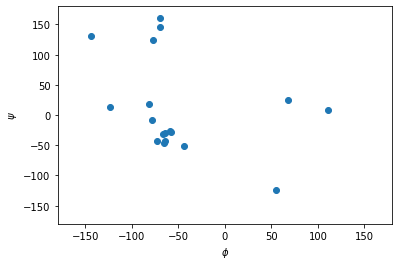

In [113]:
import matplotlib.pyplot as plt
import numpy as np

array = strucio.load_structure(file_path)[0]
phi, psi, omega = struc.dihedral_backbone(array)
plt.plot(phi * 360/(2*np.pi), psi * 360/(2*np.pi),
        marker="o", linestyle="None")
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xlabel("$\phi$")
plt.ylabel("$\psi$")

####**Comparing structures**

Now we want to calculate a measure of flexibility for each residue in TC5b. The root mean square fluctuation (RMSF) is a good value for that. It represents the deviation for each atom in all models relative to a reference model, which is usually the averaged structure. Since we are only interested in the backbone flexibility, we consider only CA atoms. Before we can calculate a reasonable RMSF, we have to superimpose each model on a reference model (we choose the first model), which minimizes the root mean square deviation (RMSD).

* **RMSF**: is a measure of the deviation of the position of a particle with respect to a reference position over time. It is the most common measure of the spatial extent of random motion, and can be thought of as measuring the portion of the system "explored" by the random walker. It can indicate structurally which amino acids in a protein contribute the most to a molecular motion. 

* **RMSD**: is the measure of the average distance between the atoms (usually the backbone atoms) of superimposed proteins. Note that RMSD calculation can be applied to other, non-protein molecules, such as small organic molecules [(Wikipedia)](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions).

RMSD for each model to first model:
[0.         0.7842643  1.0075767  0.5518028  0.8066345  1.0606678
 0.8738371  0.6260641  1.0057656  0.81440794 0.876283   1.353859
 0.93277985 0.8760094  0.99357325 0.40626574 0.31801927 1.1838906
 1.2347708  0.89114463 0.5553653  0.73639375 0.7856738  1.1019256
 0.67228884 1.1605636  0.98213965 1.2280884  0.79269636 0.8685473
 0.9386668  0.8356571  0.61650354 0.97335416 1.0322398  0.5555665
 1.1517522  0.8558534 ]


Text(0, 0.5, 'RMSF')

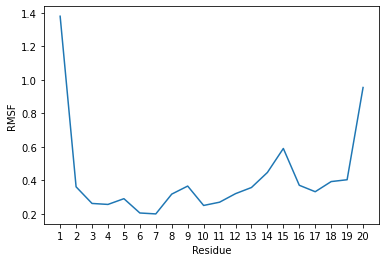

In [114]:
stack = strucio.load_structure(file_path)
# We consider only CA atoms
stack = stack[:, stack.atom_name == "CA"]
# Superimposing all models of the structure onto the first model
stack, transformation_tuple = struc.superimpose(stack[0], stack)
print("RMSD for each model to first model:")
print(struc.rmsd(stack[0], stack))
# Calculate the RMSF relative to the average of all models
rmsf = struc.rmsf(struc.average(stack), stack)
# Plotting stuff
plt.plot(np.arange(1,21), rmsf)
plt.xlim(0,21)
plt.xticks(np.arange(1,21))
plt.xlabel("Residue")
plt.ylabel("RMSF")

As we see, both terminal residues are most flexible.

####**Calculating accessible surface area**

Another interesting value for a protein structure is the **solvent accessible surface area (SASA)** that indicates whether an atom or residue is on the protein surface or buried inside the protein. The function sasa() approximates the SASA for each atom. Then we sum up the values for each residue, to get the residue-wise SASA.

**SASA**: is the surface area of a biomolecule that is accessible to a solvent. Measurement of SASA is usually described in units of square Ångstroms, a standard unit of measurement in molecular biology [(Wikipedia)](https://en.wikipedia.org/wiki/Accessible_surface_area). 

Besides other parameters, we can choose between different Van-der-Waals radii sets: Prot0r, the default set, is a set that defines radii for non-hydrogen atoms, but determines the radius of an atom based on the assumed amount of hydrogen atoms connected to it. Therefore, ProtOr is suitable for structures with missing hydrogen atoms, like crystal structures. Since the structure of TC5b was elucidated via NMR, we can assign a radius to every single atom (including hydrogens), hence we use the Single set.

Text(0, 0.5, 'SASA')

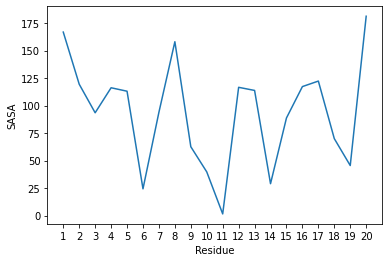

In [115]:
array = strucio.load_structure(file_path)[0]
# The following line calculates the atom-wise SASA of the atom array
atom_sasa = struc.sasa(array, vdw_radii="Single")
# Sum up SASA for each residue in atom array
res_sasa = struc.apply_residue_wise(array, atom_sasa, np.sum)
# Again plotting stuff
plt.plot(np.arange(1,21), res_sasa)
plt.xlim(0,21)
plt.xticks(np.arange(1,21))
plt.xlabel("Residue")
plt.ylabel("SASA")

####**Secondary structure determination**

Biotite can also be used to assign secondary structure elements (SSE) to a structure with the annotate_sse() function. An 'a' means alpha-helix, 'b' beta-sheet, and 'c' means coil.

**Protein Structures**: Primary structure is simply the amino acid sequence, defined by the DNA template. Secondary structure is the physical arrangement of the peptide chains as they fold and bend around the various molecular and steric constraints of the amino acid residues. The secondary structure is of intense interest because the configuration determines the reactivity of the protein and can change under certain conditions. Tertiary and quaternary structures define the 3D arrangement of the peptide chains and are determined by the various ‘weak’ forces and the interaction of the polypeptide units themselves.

In [116]:
array = strucio.load_structure(file_path)[0]
# Estimate secondary structure
sse = struc.annotate_sse(array, chain_id="A")
# Pretty print
print("".join(sse))

caaaaaaaaccccccccccc


###**4. Application Subpackage**

The [biotite.application](https://www.biotite-python.org/apidoc/biotite.application.html#module-biotite.application) package compensates for functions which aren't avaiable in Biotite by outsourcing functions to other software, containing interfaces for popular external software - biotite.application functions:

* **Application.start()**: after user calls this method, the app state is set to RUNNING and the app performs the calculations. When the application finishes the AppState changes to FINISHED. 
* **Application.join()**: once application starts, user calls this method, concluding the application in the JOINED state and making the results of the application accessible. Furthermore, this may trigger cleanup actions in some applications. Application.join() can even be called in the RUNNING state: This will constantly check if the application has finished and will directly go into the JOINED state as soon as the application reaches the FINISHED state.
* **Application.cancel()** : calling this method while the application is RUNNING or FINISHED leaves the application in the CANCELLED state. This triggers cleanup, too, but there are no accessible results. If a method is called in an unsuitable app state, an AppStateError is called. At each state in the life cycle, Application type specific methods are called, as shown in the following diagram.

The following sample code shows how an Application is generally executed. Note the space between the Application.start() and Application.join() method: Since these are separate functions, we can do some other stuff, while the Application runs in the background. Thus, an Application behaves effectively like an additional thread.

####**Integrating other software with Biotite**
To to use software in biotite.application the **corresponding software must be installed**. We use [bioconda](https://bioconda.github.io/) to install software, a subpackage of Conda, the open source package and environment management system. Biconda is a specialised version of Conda for biomedical research.

Biotite uses multiple sequence alignment algorithms **ClustalW, ClustalOmega, and Muscle**, which are integrated into the [**'msa package'**](https://bioconda.github.io/recipes/bioconductor-msa/README.html), which provides a unified R/Bioconductor interface to the multiple sequence alignment algorithms ClustalW, ClustalOmega, and Muscle. The multiple sequence alignment algorithms are complemented by a function for pretty-printing multiple sequence alignments using the LaTeX package TeXshade.

In [127]:
# Install bioconductor-msa
! conda install -c bioconda bioconductor-msa

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconductor-msa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         989 KB

The following packages will be UPDATED:

  conda                               4.12.0-py37h89c1867_0 --> 4.13.0-py37h89c1867_1



conda-4.13.0         | 989 KB    | : 100% 1.0/1 [00:00<00:00,  2.19it/s]
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done


In [117]:
from biotite.application import Application

# Create a dummy Application subclass
class MyApplication(Application):
    def __init__(self, param): super().__init__()
    def run(self): pass
    def is_finished(self): return True
    def wait_interval(self): return 0.1
    def evaluate(self): pass
    def clean_up(self): pass
    def set_some_other_input(self, param): pass
    def get_some_data(self): return "some data"

param = "foo"
param2 = "bar"
app = MyApplication(param)
app.set_some_other_input(param2)
app.start()
# Time to do other stuff
app.join()
results = app.get_some_data()

The following subsections will dive into the available Application classes in depth.

**Basic Local Alignment Search Tool** [(BLAST)](https://blast.ncbi.nlm.nih.gov/Blast.cgi): finds regions of similarity between biological sequences. The program compares nucleotide or protein sequences to sequence databases and calculates the statistical significance. BLAST can be used to infer functional and evolutionary relationships between sequences as well as help identify members of gene families. 

####**Finding homologous sequences with BLAST**

the [biotite.application.blast](https://www.biotite-python.org/apidoc/biotite.application.blast.html#module-biotite.application.blast) subpackage provides an interface to [NCBI BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi): the [BlastWebApp](https://www.biotite-python.org/apidoc/biotite.application.blast.BlastWebApp.html#biotite.application.blast.BlastWebApp) class. Let’s dive directly into the code, we try to find homologous sequences to the miniprotein TC5b:

In [118]:
import biotite.application.blast as blast
import biotite.sequence as seq

tc5b_seq = seq.ProteinSequence("NLYIQWLKDGGPSSGRPPPS")
app = blast.BlastWebApp("blastp", tc5b_seq)
app.start()
app.join()
alignments = app.get_alignments()
best_ali = alignments[0]
print(best_ali)
print()
print("HSP position in query: ", best_ali.query_interval)
print("HSP position in hit: ", best_ali.hit_interval)
print("Score: ", best_ali.score)
print("E-value: ", best_ali.e_value)
print("Hit UID: ", best_ali.hit_id)
print("Hit name: ", best_ali.hit_definition)

NLYIQWLKDGGPSSGRPPPS
NLYIQWLKDGGPSSGRPPPS

HSP position in query:  (1, 20)
HSP position in hit:  (1, 20)
Score:  101
E-value:  0.000110301
Hit UID:  1L2Y_A
Hit name:  NMR Structure of Trp-Cage Miniprotein Construct TC5b [synthetic construct]


That was a simple task for BLAST. 

As best hit, it just found the query sequence itself in the PDB. However, it gives an idea about how this Application works. Besides some optional parameters, the BlastWebApp requires the BLAST program and the query sequence. After the app has finished, we get a list of alignments with descending score. An **alignment is an instance of BlastAlignment, a subclass of biotite.sequence.align.Alignment**. It contains some additional information as shown above. The hit UID can be used to obtain the complete hit sequence via **biotite.database.entrez**.

The next alignment is more challenging. We take a random part of the E. coli BL21 genome and distort it a little bit. Since we still expect a high similarity to the original sequence, we decrease the E-value threshold.

**E-value**: the Expect value (E) is a parameter that describes the number of hits one can "expect" to see by chance when searching a database of a particular size. It decreases exponentially as the Score (S) of the match increases. Essentially, the E value describes the random background noise. For example, an E value of 1 assigned to a hit can be interpreted as meaning that in a database of the current size one might expect to see 1 match with a similar score simply by chance. The lower the E-value, or the closer it is to zero, the more "significant" the match is [NIH BLAST FAQs](https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Web&PAGE_TYPE=BlastDocs&DOC_TYPE=FAQ). 

In [119]:
distorted_bl21_excerpt = seq.NucleotideSequence(
    "CGGAAGCGCTCGGTCTCCTGGCCTTATCAGCCACTGCGCGACGATATGCTCGTCCGTTTCGAAGA"
)
app = blast.BlastWebApp("blastn", distorted_bl21_excerpt, obey_rules=False)
app.set_max_expect_value(0.1)
app.start()
app.join()
alignments = app.get_alignments()
best_ali = alignments[0]
print(best_ali)
print()
print("HSP position in query: ", best_ali.query_interval)
print("HSP position in hit: ", best_ali.hit_interval)
print("Score: ", best_ali.score)
print("E-value: ", best_ali.e_value)
print("Hit UID: ", best_ali.hit_id)
print("Hit name: ", best_ali.hit_definition)

CGGAAGCGCTCGGTCTCCTGGCC---TTATCAGCCACTGCGCGACGATATGCTCGTCCGTTTCGAAGA
CGGAAGCGCT-GGTC-CCTGCCCGCTTTATCAGGGAATGCGCGACGGCAAAATCGTCCGTTTCGAAGA

HSP position in query:  (1, 65)
HSP position in hit:  (4656858, 4656923)
Score:  56
E-value:  0.00600056
Hit UID:  CP026845
Hit name:  Shigella boydii strain NCTC 9733 chromosome, complete genome


In this code we have set obey_rules to false in the BlastWebApp constructor, if we omitted this parameter and we started the last two code snippets in quick succession, a RuleViolationError would be raised. This is because normally the BlastWebApp respects NCBI’s code of conduct and prevents you from submitting two queries within one minute. If you want to be rude to the NCBI server, create the instance with obey_rules set to false.

####**Multiple Sequence Alignments Software**

For **multiple sequence alignments (MSAs)** biotite.application offers several interfaces to MSA software. For our example Biotite choose the software MUSCLE: The subpackage **biotite.application.muscle** contains the **class MuscleApp** that does the job. We simply input the sequences we want to have aligned, run the application and get the resulting Alignment object.

In [137]:
 # Install Muscle
 ! conda install -c bioconda muscle

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - muscle


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    muscle-3.8.1551            |       h7d875b9_6         262 KB  bioconda
    ------------------------------------------------------------
                                           Total:         262 KB

The following NEW packages will be INSTALLED:

  muscle             bioconda/linux-64::muscle-3.8.1551-h7d875b9_6



muscle-3.8.1551      | 262 KB    | : 100% 1.0/1 [00:00<00:00,  4.80it/s]                 
Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done


####**MUltiple Sequence Comparison by Log- Expectation (MUSCLE)** 

MUSCLE is widely-used software [(GitHub)](https://github.com/rcedgar/muscle) for making multiple alignments of biological sequences. Version 5 of MUSCLE achieves highest scores on Balibase, Bralibase and Balifam benchmark tests and scales to thousands of sequences on a commodity desktop computer.

This version supports generating an ensemble of alternative alignments with the same high accuracy obtained with default parameters. By comparing downstream predictions from different alignments, such as trees, a biologist can evaluation the robustness of conclusions against alignment errors.

**References:**

* Edgar, R.C. MUSCLE: a multiple sequence alignment method with reduced time and space complexity. BMC Bioinformatics 5, 113 (2004). https://doi.org/10.1186/1471-2105-5-113

In [138]:
import biotite.application.muscle as muscle
import biotite.sequence as seq

In [139]:
seq1 = seq.ProteinSequence("BIQTITE")
seq2 = seq.ProteinSequence("TITANITE")
seq3 = seq.ProteinSequence("BISMITE")
seq4 = seq.ProteinSequence("IQLITE")
app = muscle.MuscleApp([seq1, seq2, seq3, seq4])
app.start()
app.join()
alignment = app.get_alignment()
print(alignment)

BIQT-ITE
TITANITE
BISM-ITE
-IQL-ITE


In most MSA software even more information than the mere alignment can be extracted. For instance the guide tree, that was used for the alignment, can be obtained from the MUSCLE output.

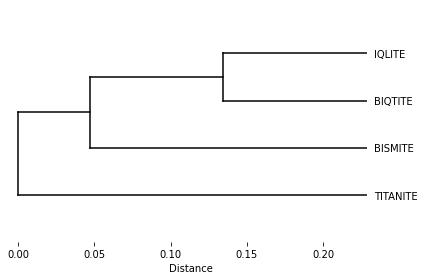

In [140]:
import biotite.sequence.graphics as graphics

tree = app.get_guide_tree()
fig, ax = plt.subplots()
graphics.plot_dendrogram(
    ax, tree, labels=[str(sequence) for sequence in [seq1, seq2, seq3, seq4]]
)
ax.set_xlabel("Distance")
fig.tight_layout()

The alternatives to MUSCLE are Clustal-Omega and MAFFT. To use them, simply replace MuscleApp with ClustalOmegaApp or MafftApp.

In [136]:
 ! conda install -c bioconda clustalo 

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - clustalo


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argtable2-2.13             |    h14c3975_1001         2.7 MB  conda-forge
    clustalo-1.2.4             |       h1b792b2_4         313 KB  bioconda
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  argtable2          conda-forge/linux-64::argtable2-2.13-h14c3975_1001
  clustalo           bioconda/linux-64::clustalo-1.2.4-h1b792b2_4



argtable2-2.13       | 2.7 MB    | : 100% 1.0/1 [00:00<00:00,  1.55it/s]
clustalo-1.2.4       | 313 KB    | : 100% 1.0/1 [00:00<00:00,  8.08it/s]
Preparing transaction: \ do

####**CLUSTAL-OMEGA** 

[CLUSTAL-OMEGA](http://www.clustal.org/) is a general purpose multiple sequence alignment program for protein and DNA/RNA.

**References:**
* Sievers F, Wilm A, Dineen D, Gibson TJ, Karplus K, Li W, Lopez R, McWilliam H, Remmert M, Söding J, Thompson JD, Higgins DG.  Fast, scalable generation of high-quality protein multiple sequence alignments using Clustal Omega.  Mol Syst Biol. 2011 Oct 11;7:539. doi: 10.1038/msb.2011.75. PMID: 21988835.

In [141]:
import biotite.application.clustalo as clustalo

alignment = clustalo.ClustalOmegaApp.align([seq1, seq2, seq3, seq4])
print(alignment)

-BIQTITE
TITANITE
-BISMITE
--IQLITE


As shown in the output, the alignment with Clustal-Omega slightly differs from the one performed with MUSCLE.

If the MSA software supports protein sequence alignment AND custom substitution matrices, e.g. MUSCLE and MAFFT, almost any type of sequence can be aligned: Internally the sequences and the matrix are converted into protein sequences/matrix. Then the masquerading sequences are aligned via the software and finally the sequences are mapped back into the original sequence type. Let’s show this on the example of a nonsense alphabet.

In [144]:
 ! conda install -c bioconda mafft

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mafft


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mafft-7.310                |       h1b792b2_4         2.7 MB  bioconda
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  mafft              bioconda/linux-64::mafft-7.310-h1b792b2_4



mafft-7.310          | 2.7 MB    | : 100% 1.0/1 [00:01<00:00,  1.00s/it]
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done


####**Multiple Alignment using Fast Fourier Transform (MAFFT)**  

[MAFFT](https://github.com/GSLBiotech/mafft) is used to create high speed multiple sequence alignments of amino acid or nucleotide sequences. Published in 2002, the first version of MAFFT used an algorithm based on progressive alignment, in which the sequences were clustered with the help of the Fast Fourier Transform. Subsequent versions of MAFFT have added other algorithms and modes of operation, including options for faster alignment of large numbers of sequences, higher accuracy alignments, alignment of non-coding RNA sequences, and the addition of new sequences to existing alignments.

**References:**
* Kazutaka Katoh, Kazuharu Misawa, Kei‐ichi Kuma, Takashi Miyata, MAFFT: a novel method for rapid multiple sequence alignment based on fast Fourier transform, Nucleic Acids Research, Volume 30, Issue 14, 15 July 2002, Pages 3059–3066, https://doi.org/10.1093/nar/gkf436 

In [145]:
import biotite.application.mafft as mafft

In [146]:
import biotite.sequence.align as align

alphabet = seq.Alphabet(("foo", "bar", 42))
sequences = [seq.GeneralSequence(alphabet, sequence) for sequence in [
    ["foo", "bar", 42, "foo", "foo", 42, 42],
    ["foo", 42, "foo", "bar", "foo", 42, 42],
]]
matrix = align.SubstitutionMatrix(
    alphabet, alphabet, np.array([
        [ 100, -100, -100],
        [-100,  100, -100],
        [-100, -100,  100]
    ])
)
alignment = mafft.MafftApp.align(sequences, matrix=matrix)
# As the alphabet do not has characters as symbols
# the alignment cannot be directly printed
# However, we can print the trace
print(alignment.trace)

[[ 0  0]
 [ 1 -1]
 [ 2  1]
 [ 3  2]
 [-1  3]
 [ 4  4]
 [ 5  5]
 [ 6  6]]


###**Secondary structure annotation**

Althogh biotite.structure offers the function annotate_sse() to assign secondary structure elements based on the P-SEA algorithm, DSSP can also be used via the biotite.application.dssp subpackage (provided that DSSP is installed). Let us demonstrate this on the example of miniprotein TC5b.

####**DSSP**

DSSP standardises secondary structure assignment. DSSP defines secondary structure, geometrical features and solvent exposure of proteins, given atomic coordinates in Protein Data Bank format (PDB) or macromolecular Crystallographic Information File format (mmCIF).  

It is a database of secondary structure assignments (and much more) for all protein entries in the Protein Data Bank (PDB). DSSP is also the name of the program that calculates DSSP entries from PDB entries. It means there are actually two ways of looking at DSSP. First of all there are the precalculated DSSP files for each PDB entry, and then there's the application called DSSP that can create these files.

**Theory**: DSSP program works by calculating the most likely secondary structure assignment given the 3D structure of a protein. It does this by reading the position of the atoms in a protein followed by calculation of the H-bond energy between all atoms. 

The algorithm will discard any hydrogens present in the input structure and calculates the optimal hydrogen positions by placing them at 1.000 Å from the backbone N in the opposite direction from the backbone C=O bond. The best two H-bonds for each atom are then used to determine the most likely class of secondary structure for each residue in the protein. 

It means we do need to have a full and valid 3D structure for a protein to be able to calculate the secondary structure. DSSP does not predict secondary structures, it just extracts this information from the 3D coordinates.

In [158]:
! conda install -c salilab dssp

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with n